<a href="https://colab.research.google.com/github/manpreethsai/GTD_GOOGLE_COLLAB/blob/master/GTD_EDA_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('GLOBAL_TERRORISM.csv', encoding='ISO-8859-1')
df.head()

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...      0.0       0.0     0.0      NaN
1  197000000002   1970       0     0  ...      1.0       1.0     1.0      NaN
2  197001000001   1970       1     0  ...     -9.0       1.0     1.0      NaN
3  197001000002   1970       1     0  ...     -9.0       1.0     1.0      NaN
4  197001000003   1970       1     0  ...     -9.0       1.0     1.0      NaN

[5 rows x 135 columns]

In [ ]:
map_cols = {
'eventid' : 'GTD_ID ',
'iyear' : 'YEAR',
'imonth' : 'MONTH', 
'iday' : 'DAY',
'extended' : 'EXTENDED_INCIDENT',  
'summary' : 'INCIDENT_SUMMARY',
'crit1' : 'INCLUSION_CRITERIA_1',
'crit2' : 'INCLUSION_CRITERIA_2', 
'crit3' : 'INCLUSION_CRITERIA_3',
'multiple' : 'PART_OF_MULTIPLE_INCIDENT',  
'related' : 'RELATED_INCIDENTS',  
'country' : 'COUNTRY_CODE',
'country_txt' : 'COUNTRY_TXT',  
'region' : 'REGION_CODE',
'region_txt' : 'REGION_TXT',  
'city' : 'CITY_NAME',  
'latitude' : 'LATITUDE',  
'longitude' : 'LONGITUDE',  
'specificity' : 'GEOCODING_SPECIFICITY',  
'attacktype1' : 'ATTACK_TYPE_CODE',
'attacktype1_txt' : 'ATTACK_TYPE_TXT',  
'success' : 'SUCCESSFUL_ATTACK', 
'suicide' : 'SUICIDE_ATTACK',  
'weaptype1' : 'WEAPON_TYPE_CODE',
'weaptype1_txt' : 'WEAPON_TYPE_TXT',  
'targtype1' : 'VICTIM_TYPE_CODE',
'targtype1_txt' : 'VICTIM_TYPE_TXT',  
'corp1' : 'NAME_OF_ENTITY',  
'natlty1' : 'NATIONALITY_OF_VICTIM_CODE',
'natlty1_txt' : 'NATIONALITY_OF_VICTIM_TXT',  
'individual' : 'UNAFFLIATED INDIVIDUALS',  
'gname' : 'PREPETRATOR GROUP NAME',  
'nperps' : 'NUMBER OF PREPETRATORS',  
'claimed' : 'CLAIM OF RESPONSIBILTY',  
'motive' : 'MOTIVE',  
'nkill' : 'TOTAL FATALITIES',  
'nkillter' : 'PREPETRATOR FATALITIES',  
'nwound' : 'TOTAL INJURED',  
'nwoundte' : 'PREPETRATORS INJURED',  
'property' : 'PROPERTY DAMAGE',  
'propvalue' : 'VALUE OF PROPERTY DAMAGE in usd',  
'nhostkid' : 'TOTAL NO. OF HOSTAGES / VICTIM KIDNAPS',  
'ransomamt' : 'TOTAL RANSOM AMOUNT DEMANDED',  
'ransompaid' : 'TOTAL RANSOM AMOUNT PAID',  
'INT_IDEO' : 'INTERNATIONAL_IDELOGICAL', 
'doubtterr' : 'DOUBT TERRORISM PROPER',
'alternative_txt' : 'ALTERNATIVE CRIME'
}

    


In [ ]:
df_cut = df[map_cols.keys()]
df_cut.head()

eventid  iyear  imonth  ...  INT_IDEO  doubtterr alternative_txt
0  197000000001   1970       7  ...       0.0        0.0             NaN
1  197000000002   1970       0  ...       1.0        0.0             NaN
2  197001000001   1970       1  ...      -9.0        0.0             NaN
3  197001000002   1970       1  ...      -9.0        0.0             NaN
4  197001000003   1970       1  ...      -9.0       -9.0             NaN

[5 rows x 47 columns]

In [ ]:
df_cut.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133359 entries, 0 to 133358
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          133359 non-null  int64  
 1   iyear            133359 non-null  int64  
 2   imonth           133359 non-null  int64  
 3   iday             133359 non-null  int64  
 4   extended         133359 non-null  int64  
 5   summary          67230 non-null   object 
 6   crit1            133359 non-null  int64  
 7   crit2            133359 non-null  int64  
 8   crit3            133359 non-null  int64  
 9   multiple         133358 non-null  float64
 10  related          16403 non-null   object 
 11  country          133359 non-null  int64  
 12  country_txt      133359 non-null  object 
 13  region           133359 non-null  int64  
 14  region_txt       133359 non-null  object 
 15  city             132925 non-null  object 
 16  latitude         129078 non-null  floa

In [ ]:
td = df_cut.copy(deep=True)

In [ ]:
td['motive'].value_counts()

Unknown                                                                                                                                                                                                                                                   14889
The specific motive for the attack is unknown.                                                                                                                                                                                                            14430
The specific motive for the attack is unknown..                                                                                                                                                                                                             148
The specific motive for the attack is unknown or was not reported.                                                                                                                                                                      

In [ ]:
td.drop(columns=['summary', 'motive', 'corp1'], inplace=True)
td.head()

eventid  iyear  imonth  ...  INT_IDEO  doubtterr  alternative_txt
0  197000000001   1970       7  ...       0.0        0.0              NaN
1  197000000002   1970       0  ...       1.0        0.0              NaN
2  197001000001   1970       1  ...      -9.0        0.0              NaN
3  197001000002   1970       1  ...      -9.0        0.0              NaN
4  197001000003   1970       1  ...      -9.0       -9.0              NaN

[5 rows x 44 columns]

In [ ]:
td.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'crit1', 'crit2',
       'crit3', 'multiple', 'related', 'country', 'country_txt', 'region',
       'region_txt', 'city', 'latitude', 'longitude', 'specificity',
       'attacktype1', 'attacktype1_txt', 'success', 'suicide', 'weaptype1',
       'weaptype1_txt', 'targtype1', 'targtype1_txt', 'natlty1', 'natlty1_txt',
       'individual', 'gname', 'nperps', 'claimed', 'nkill', 'nkillter',
       'nwound', 'nwoundte', 'property', 'propvalue', 'nhostkid', 'ransomamt',
       'ransompaid', 'INT_IDEO', 'doubtterr', 'alternative_txt'],
      dtype='object')

In [ ]:
cat_cols = ['extended', 'crit1', 'crit2', 'crit3', 'multiple', 'country', 'country_txt', 'region',
       'region_txt', 'city', 'specificity',
       'attacktype1', 'attacktype1_txt', 'success', 'suicide', 'weaptype1',
       'weaptype1_txt', 'targtype1', 'targtype1_txt', 'natlty1',
       'natlty1_txt', 'individual', 'gname', 'claimed', 'property', 'INT_IDEO', 'doubtterr', 'alternative_txt' ]

In [ ]:
for each in cat_cols:
    td[each] = td[each].astype('category')

In [ ]:
td.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133359 entries, 0 to 133358
Data columns (total 44 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   eventid          133359 non-null  int64   
 1   iyear            133359 non-null  int64   
 2   imonth           133359 non-null  int64   
 3   iday             133359 non-null  int64   
 4   extended         133359 non-null  category
 5   crit1            133359 non-null  category
 6   crit2            133359 non-null  category
 7   crit3            133359 non-null  category
 8   multiple         133358 non-null  category
 9   related          16403 non-null   object  
 10  country          133359 non-null  category
 11  country_txt      133359 non-null  category
 12  region           133359 non-null  category
 13  region_txt       133359 non-null  category
 14  city             132925 non-null  category
 15  latitude         129078 non-null  float64 
 16  longitude        129

In [ ]:
mask1 = td['country_txt'] == 'India'
ind = td[mask1].copy(deep=True)
ind.head()

eventid  iyear  imonth  ...  INT_IDEO doubtterr alternative_txt
1186  197202220004   1972       2  ...       1.0       0.0             NaN
2764  197501190004   1975       1  ...       0.0       0.0             NaN
3857  197605260001   1976       5  ...      -9.0       0.0             NaN
5327  197709280004   1977       9  ...       1.0       0.0             NaN
7337  197901130004   1979       1  ...       0.0      -9.0             NaN

[5 rows x 44 columns]

In [ ]:
ind['related'] = ind['related'].astype('category')
ind['related']

1186      NaN
2764      NaN
3857      NaN
5327      NaN
7337      NaN
         ... 
133334    NaN
133335    NaN
133342    NaN
133343    NaN
133353    NaN
Name: related, Length: 8672, dtype: category
Categories (882, object): [198310130002, 198310130003, 198404150005, 198404150006, 198404150007, 1984...,
                           198703030001, 198703030002, 198703030002, 198703030001, ...,
                           201405100061, 201405100062, 201405120064, 201405120065,
                           201405260212, 201405260218, 201405280063, 201405280064]

In [ ]:
ind['doubtterr'].values
ind['doubtterr'] = ind['doubtterr'].astype('float')
ind['doubtterr'].replace(-9, np.nan)

1186      0.0
2764      0.0
3857      0.0
5327      0.0
7337      NaN
         ... 
133334    1.0
133335    1.0
133342    0.0
133343    0.0
133353    0.0
Name: doubtterr, Length: 8672, dtype: float64

In [ ]:
ind['doubtterr'] = ind['doubtterr'].astype('bool')
ind['doubtterr'].value_counts()


False    6900
True     1772
Name: doubtterr, dtype: int64

In [56]:
import sweetviz as sv
my_report = sv.analyze(ind, target_feat = 'doubtterr', pairwise_analysis = 'on')


:FEATURES DONE:                    |█████████████████████| [100%]   00:18  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:10  -> (00:00 left)


Creating Associations graph... DONE!


In [57]:
my_report.show_html(filepath='SWEETVIZ_REPORT_BOOL_fit.html', layout= 'responsive')

Report SWEETVIZ_REPORT_BOOL_fit.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
!pip install sweetviz

In [ ]:
!pip install autoviz


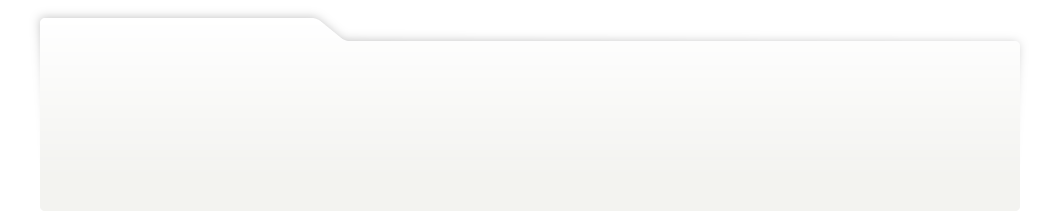
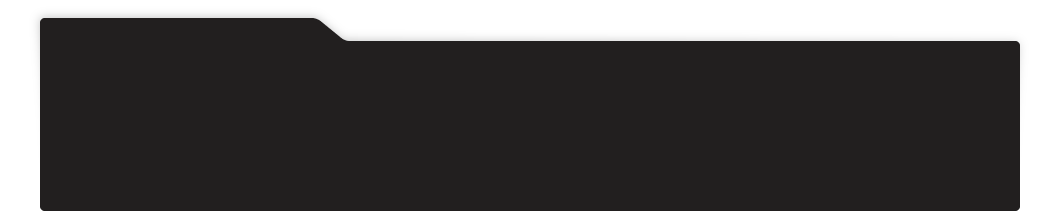
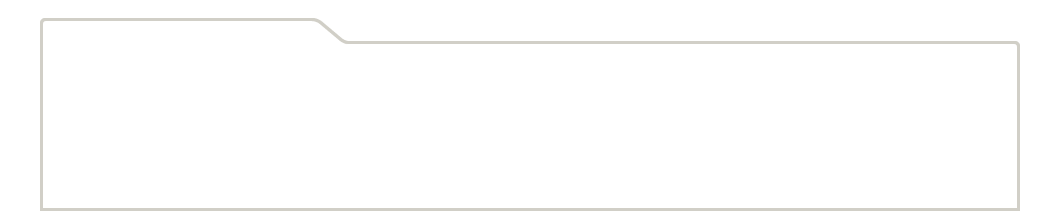
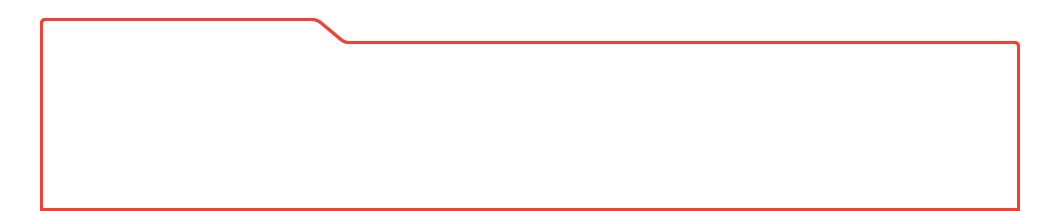
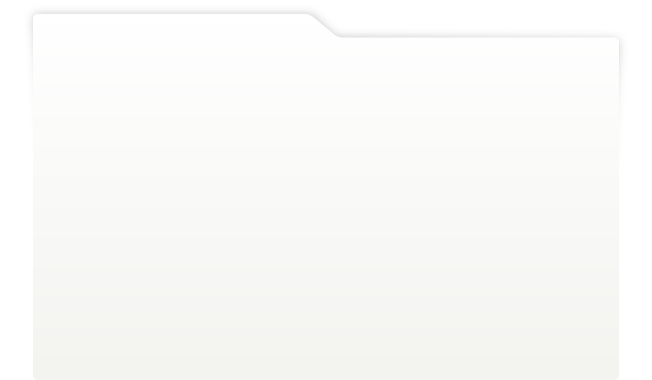
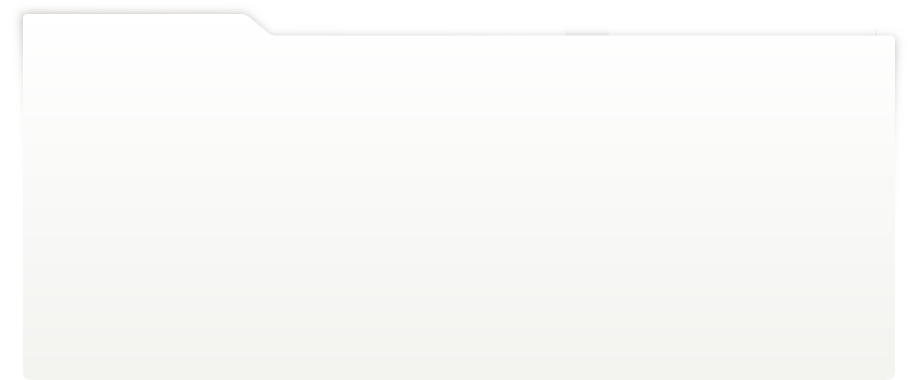
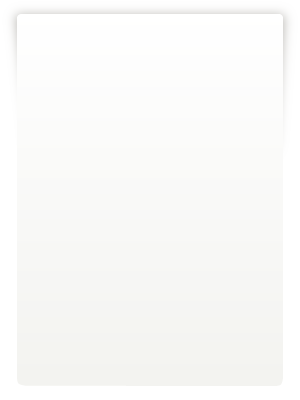
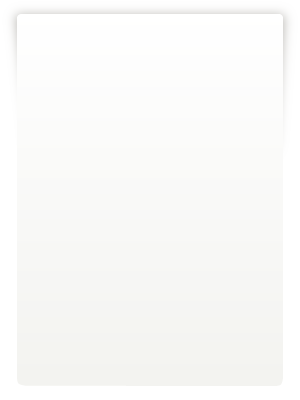
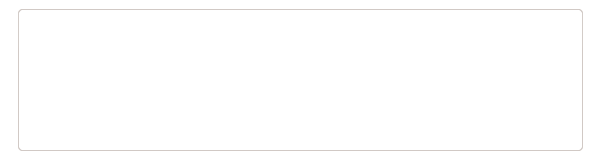
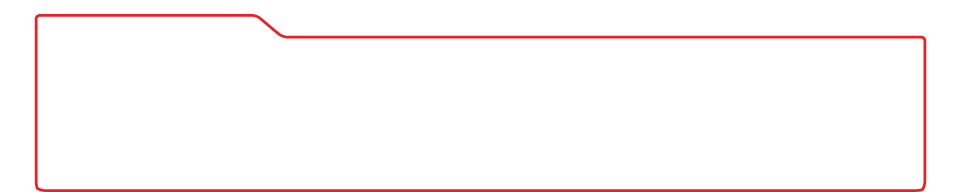
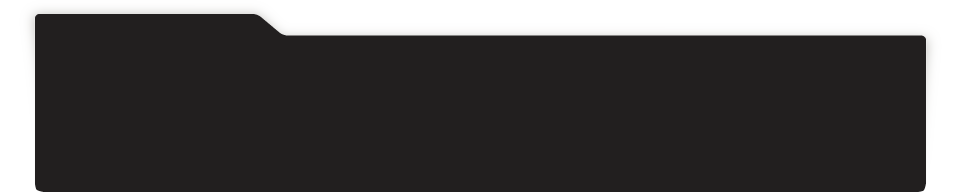
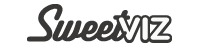
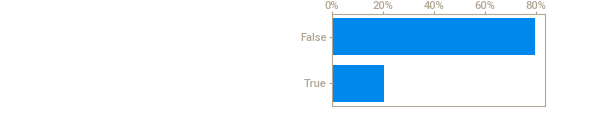
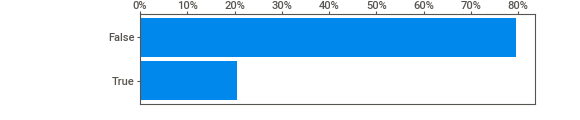
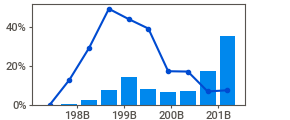
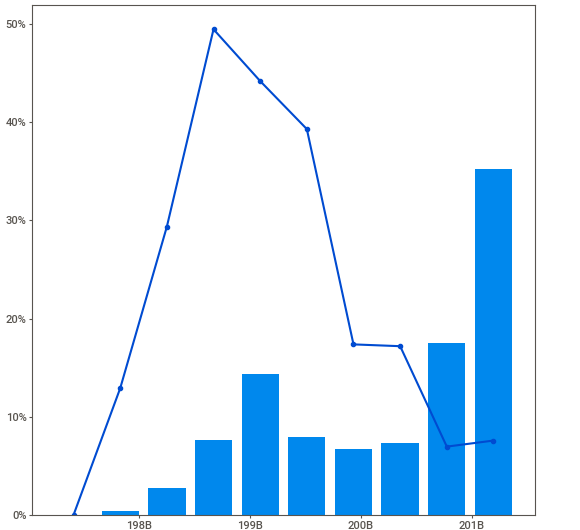
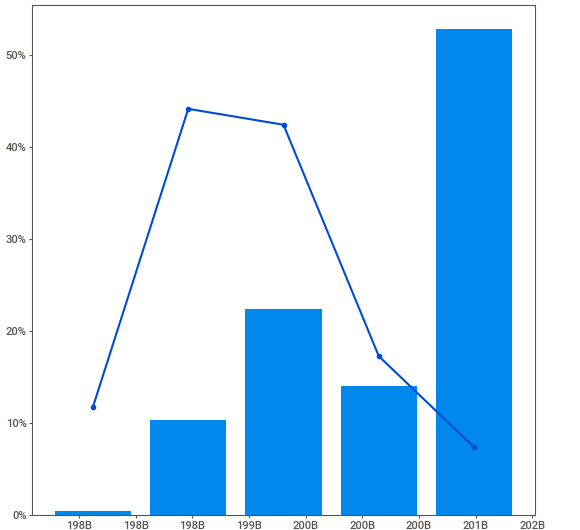
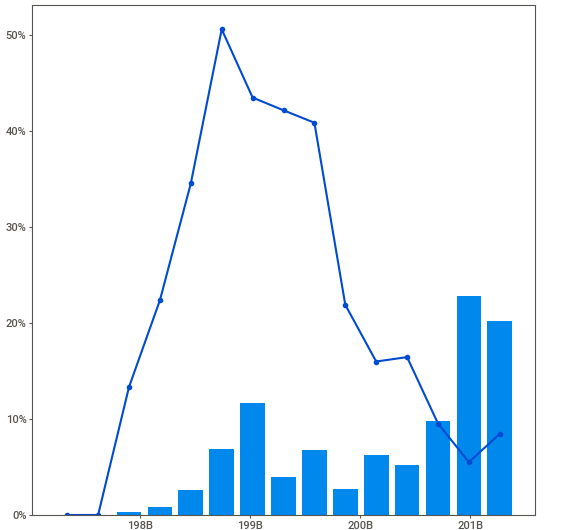
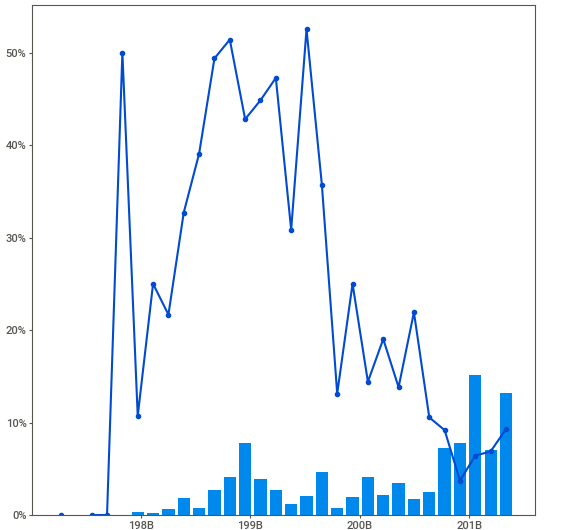
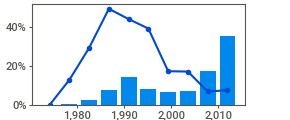
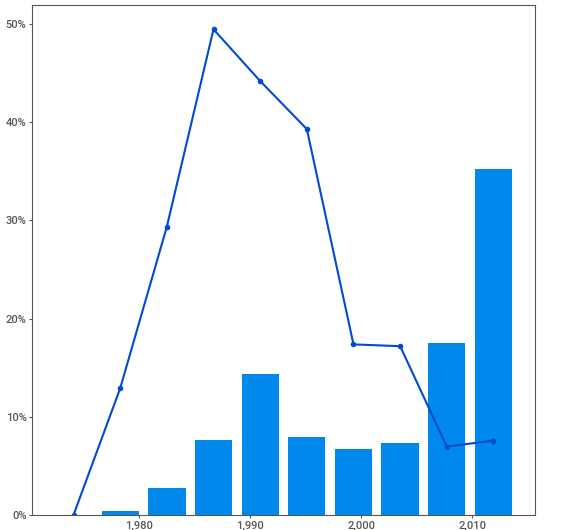
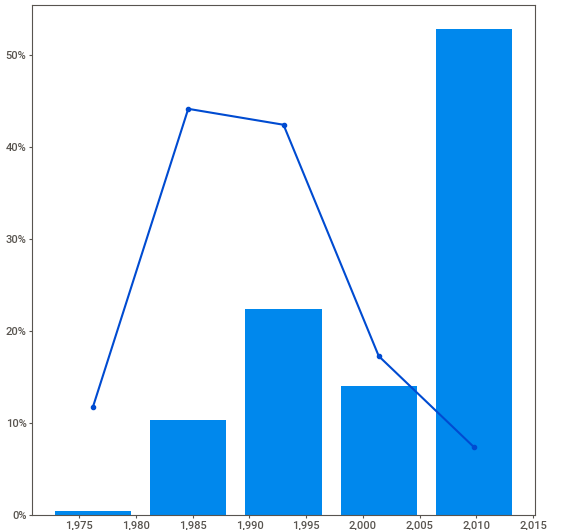
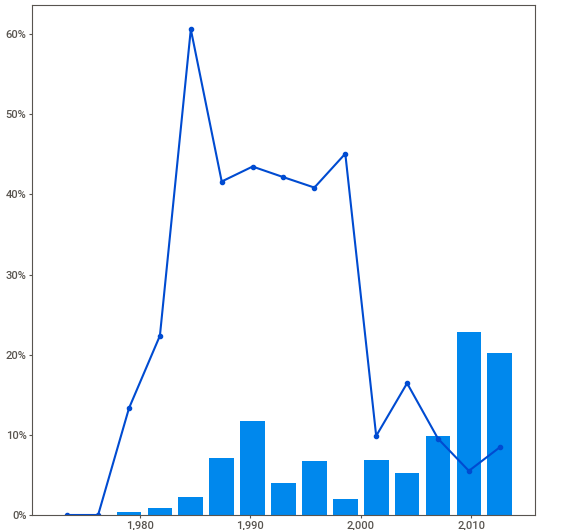
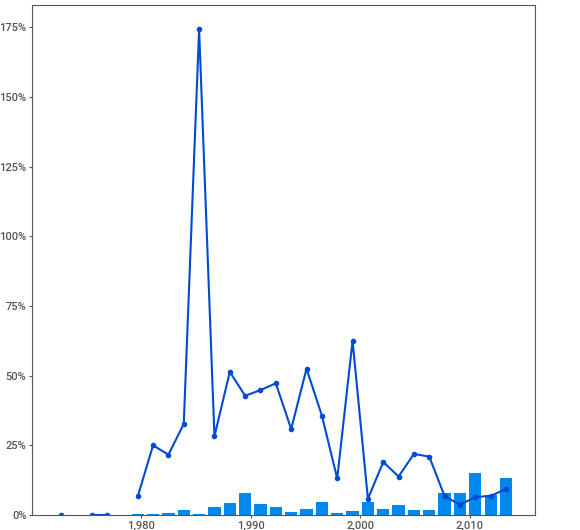
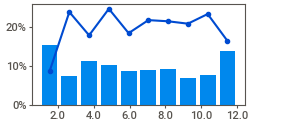
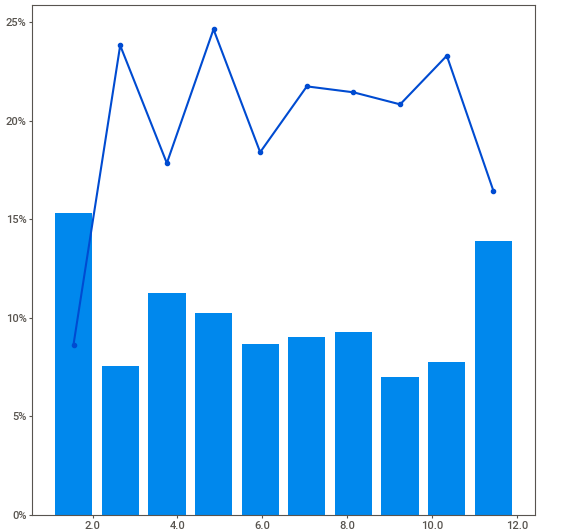
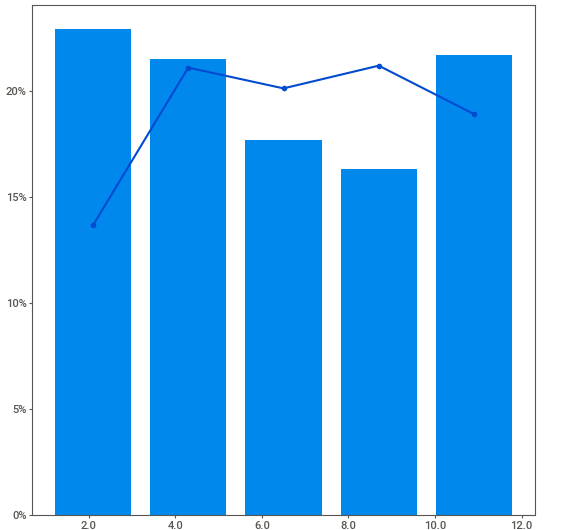
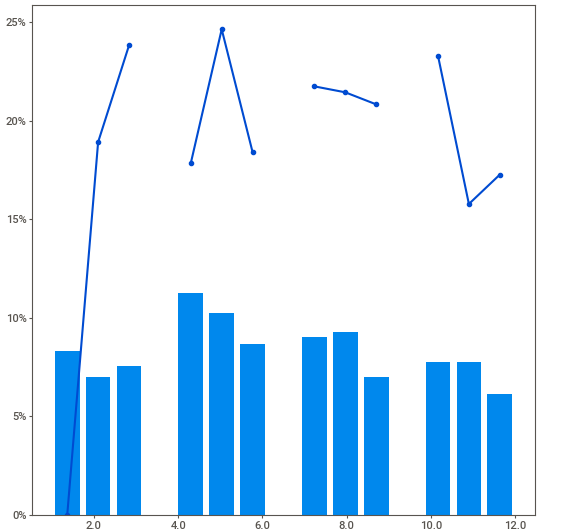
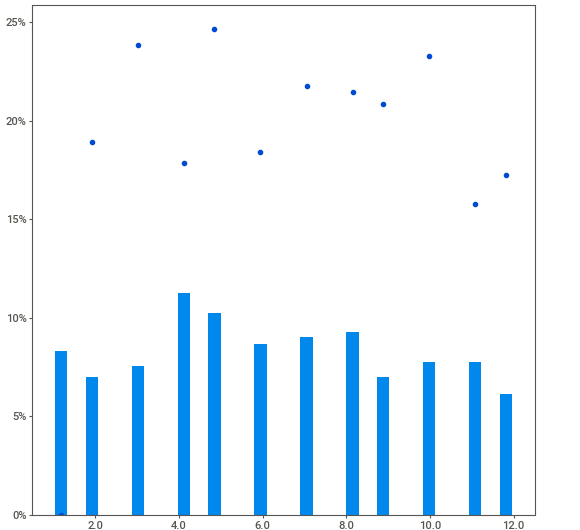
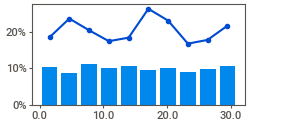
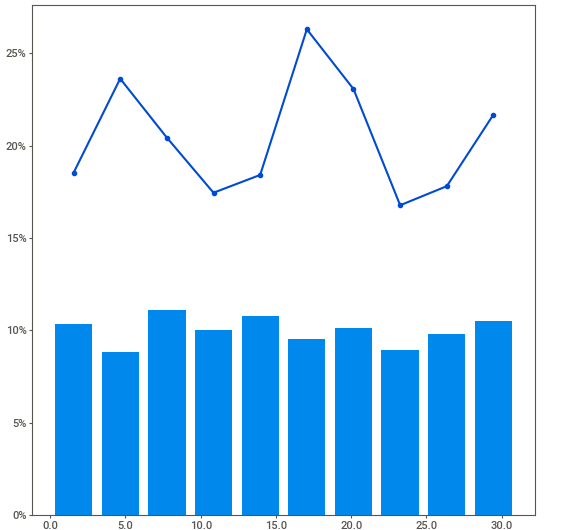
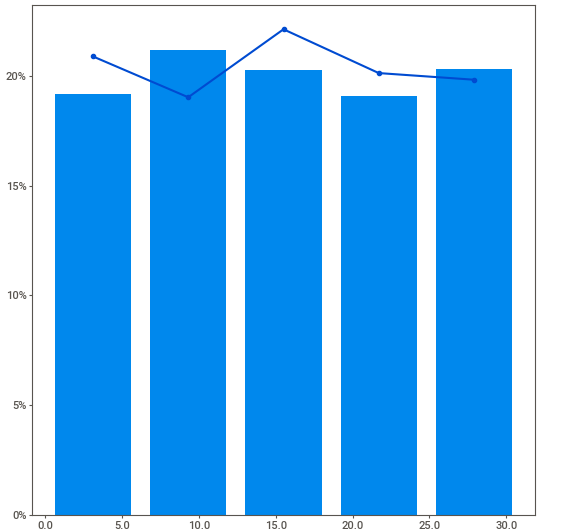
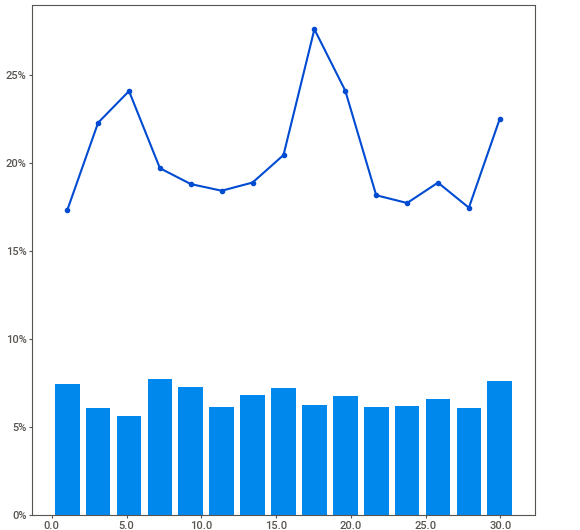
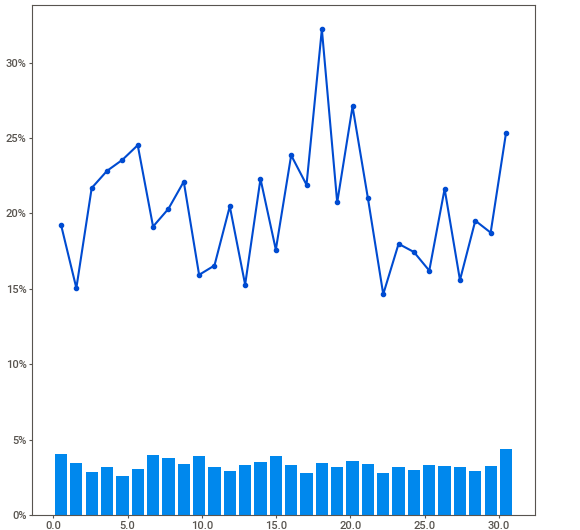
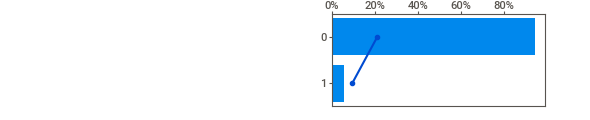
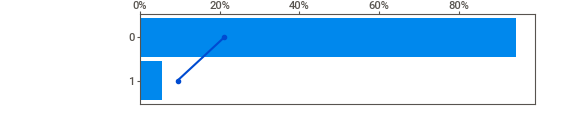
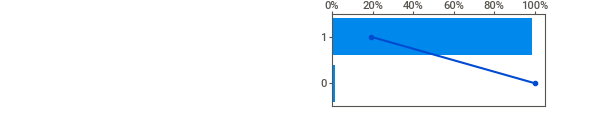
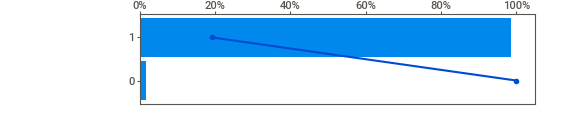
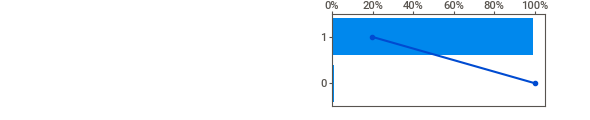
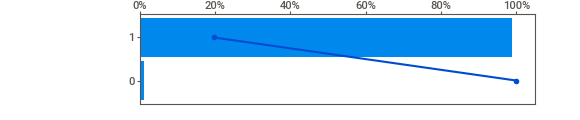
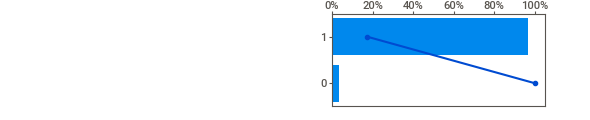
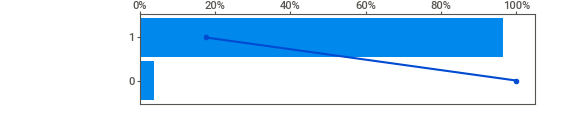
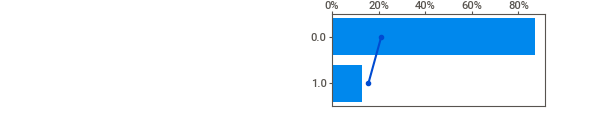
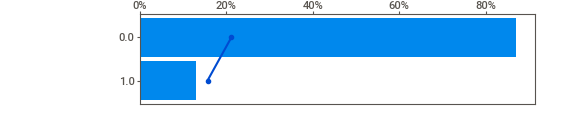
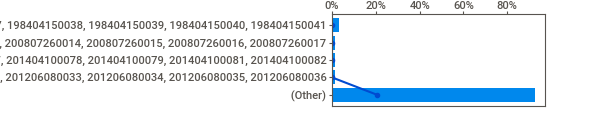
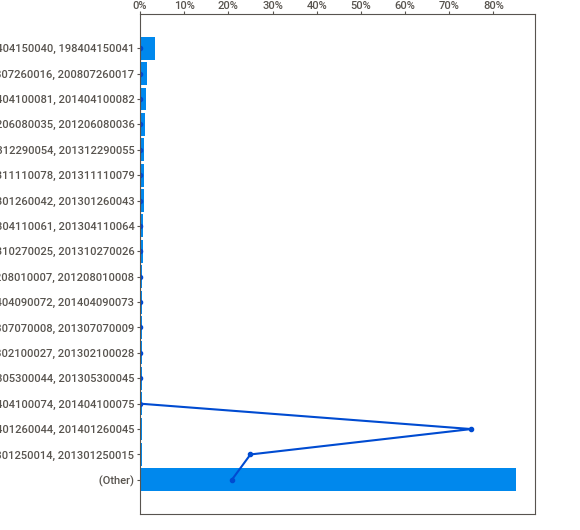
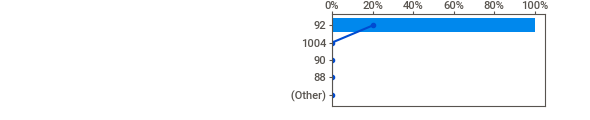
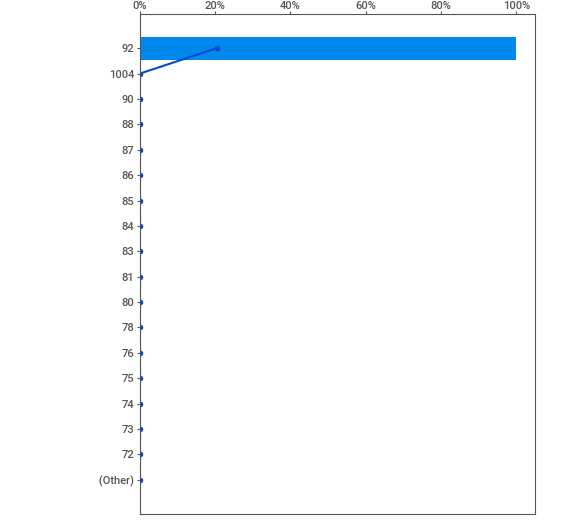
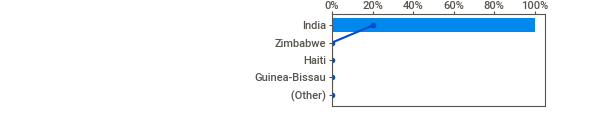
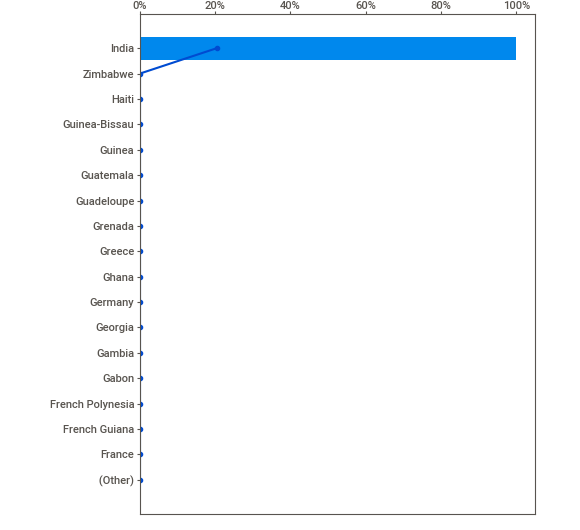
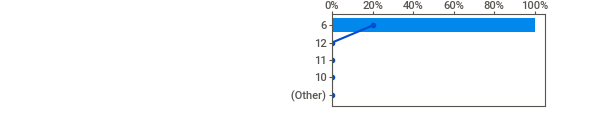
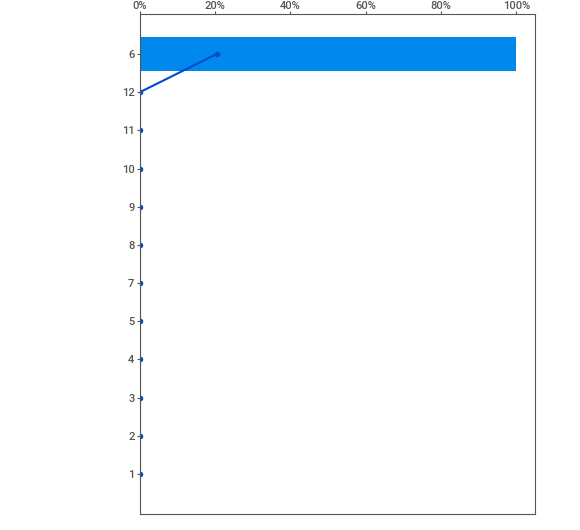
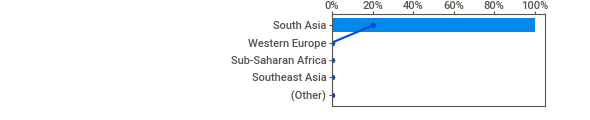
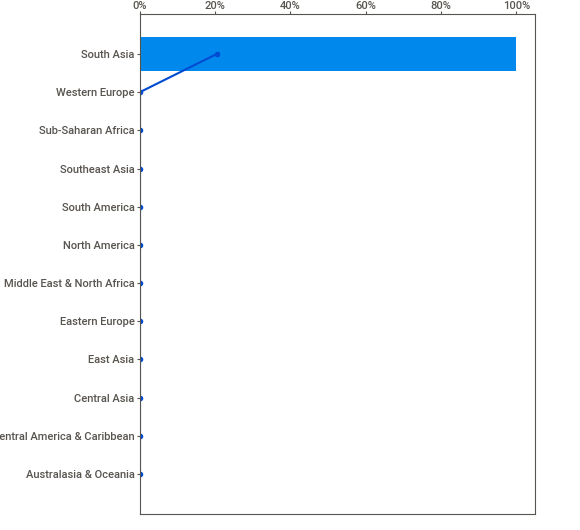
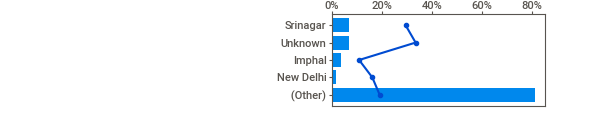
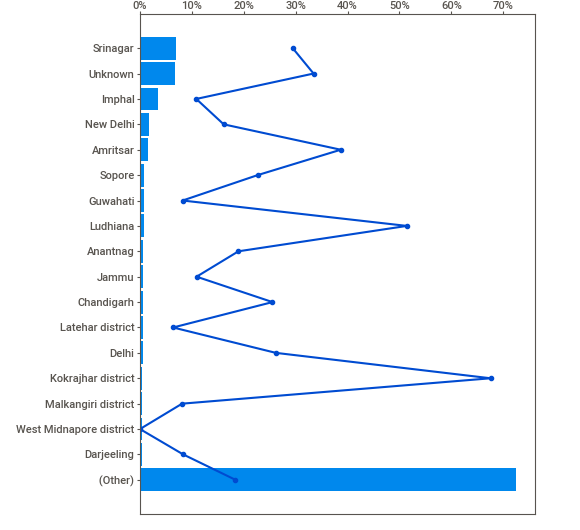
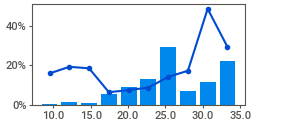
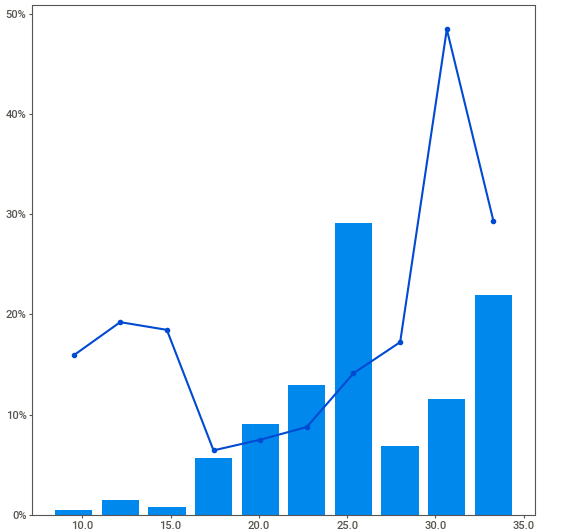
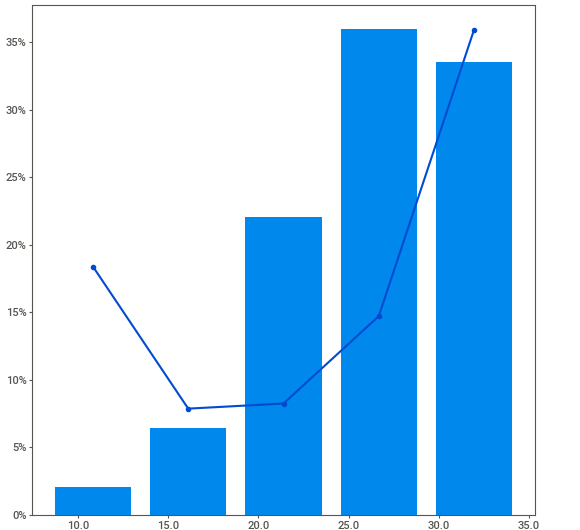
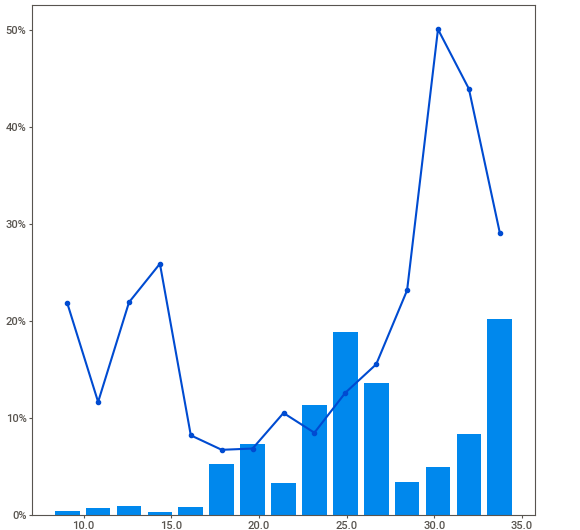
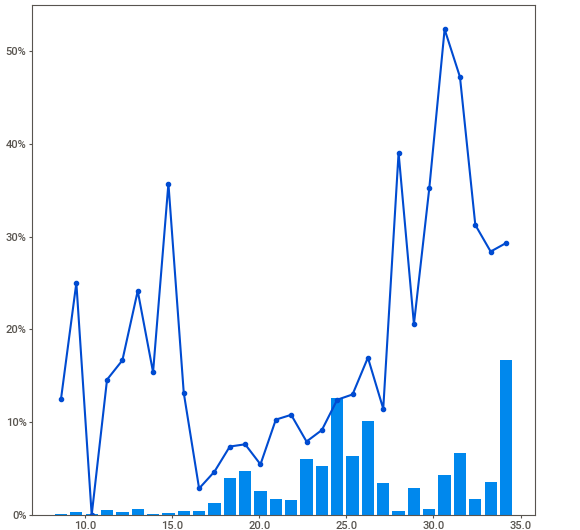
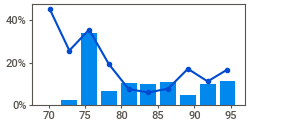
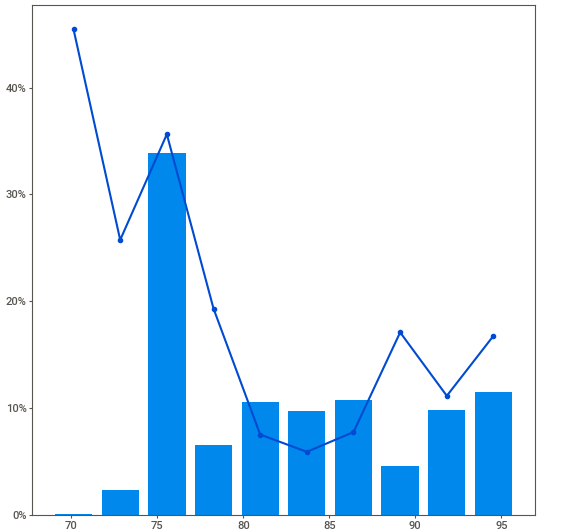
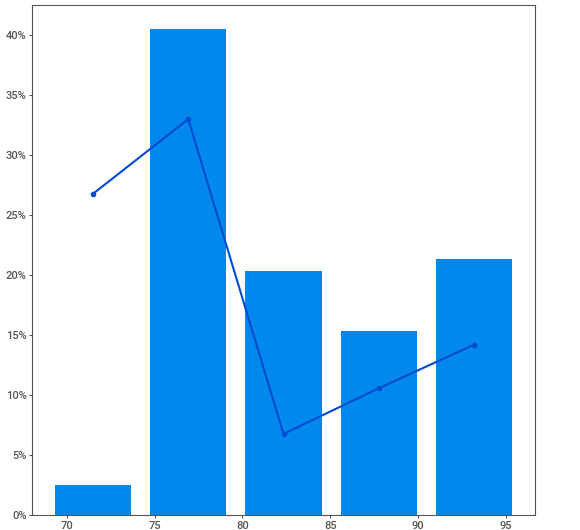
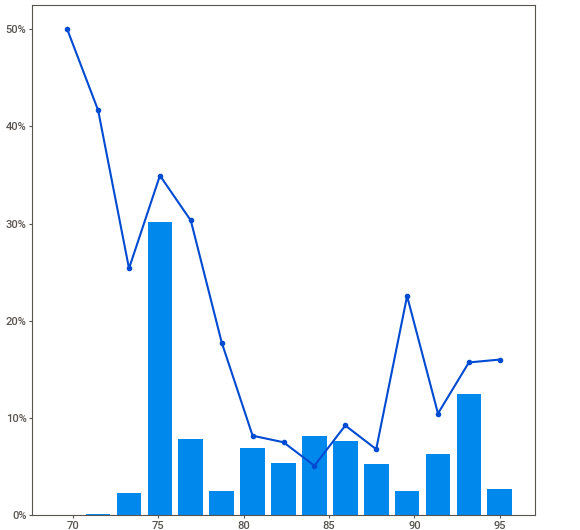
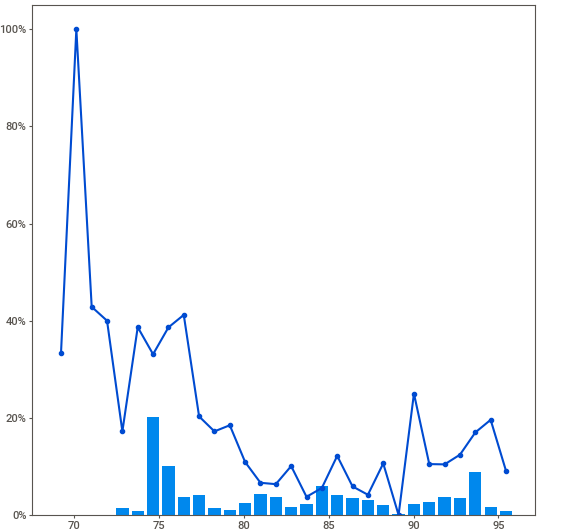
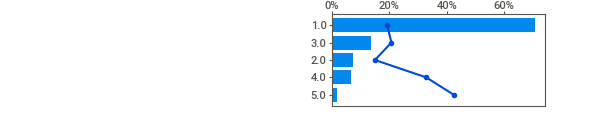
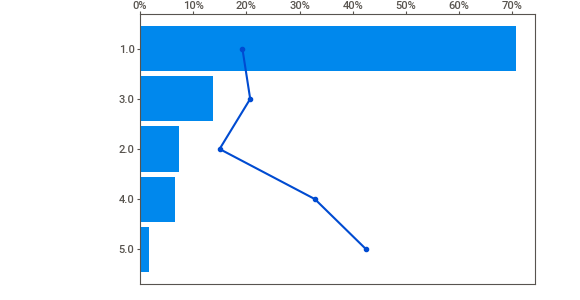
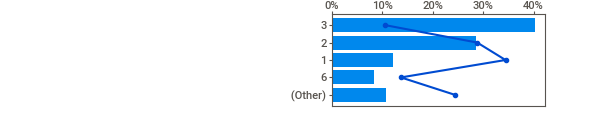
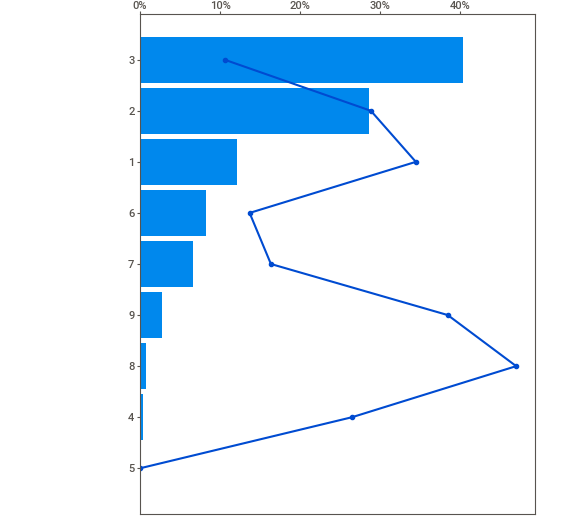
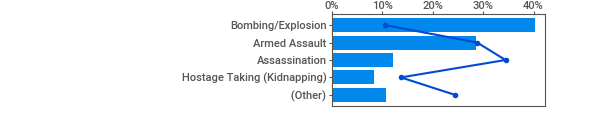
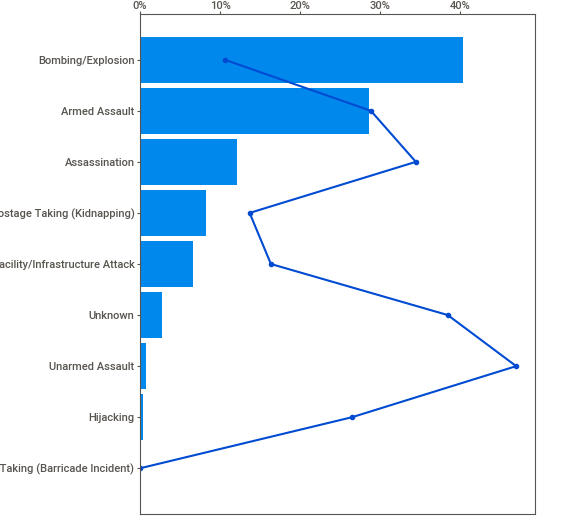
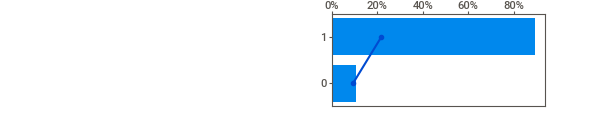
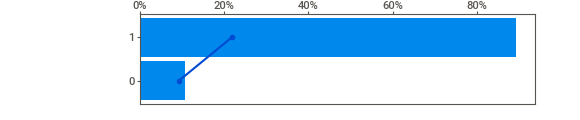
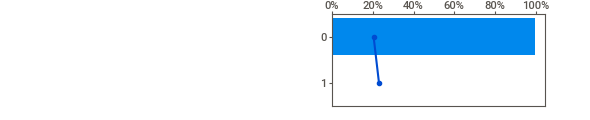
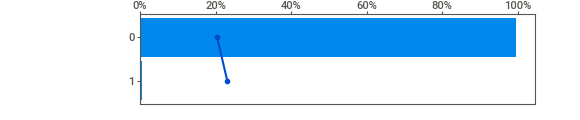
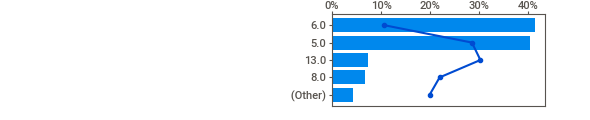
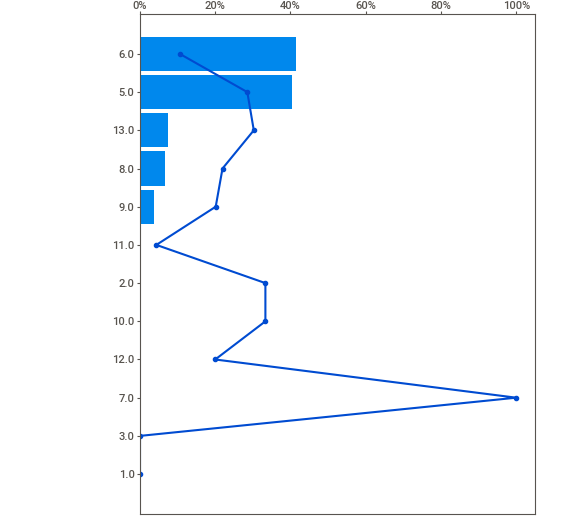
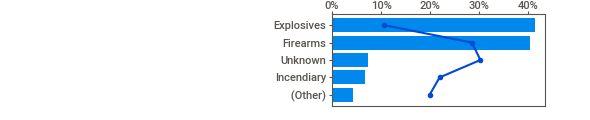
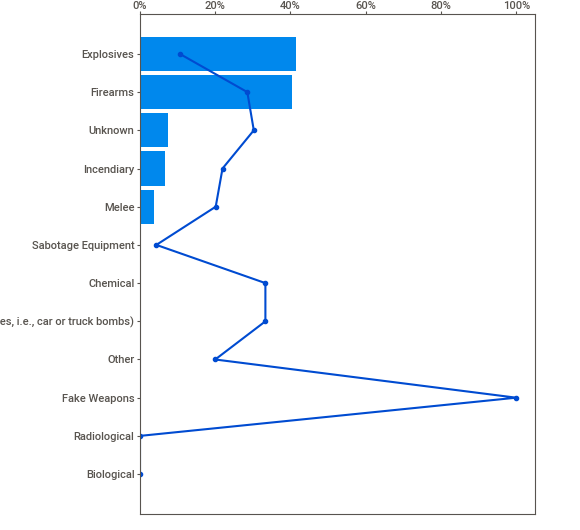
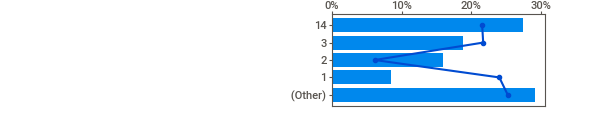
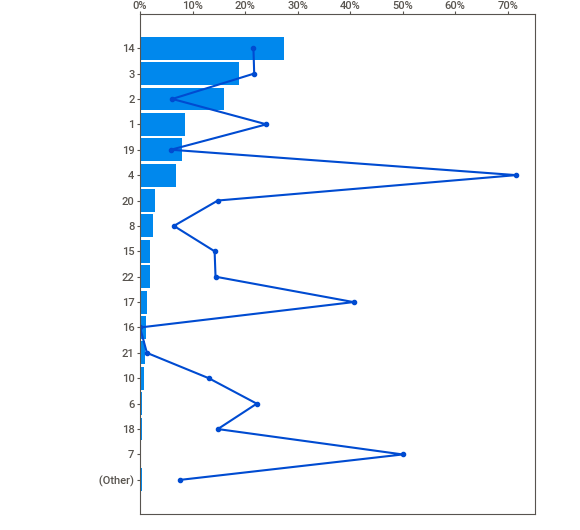
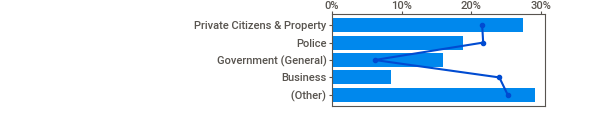
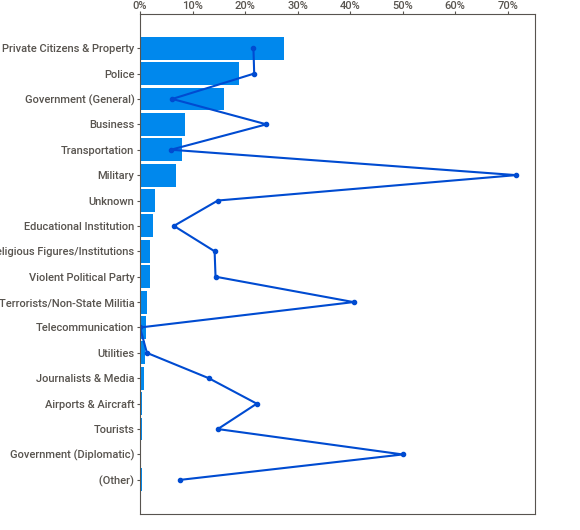
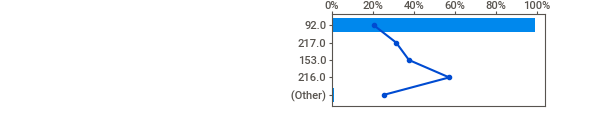
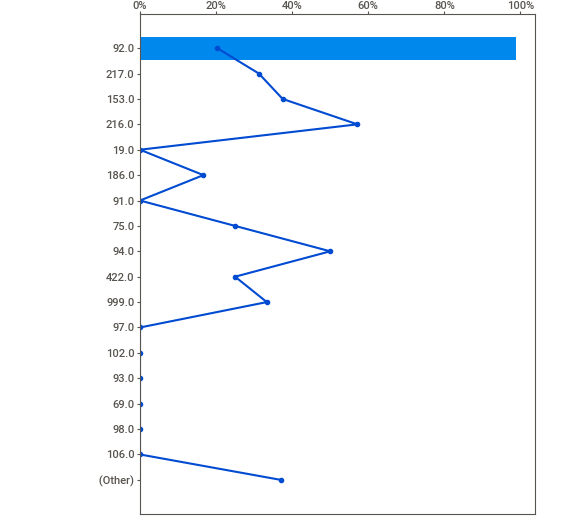
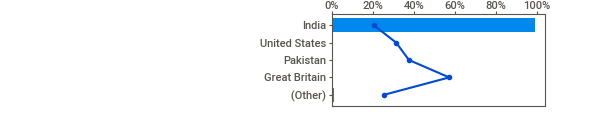
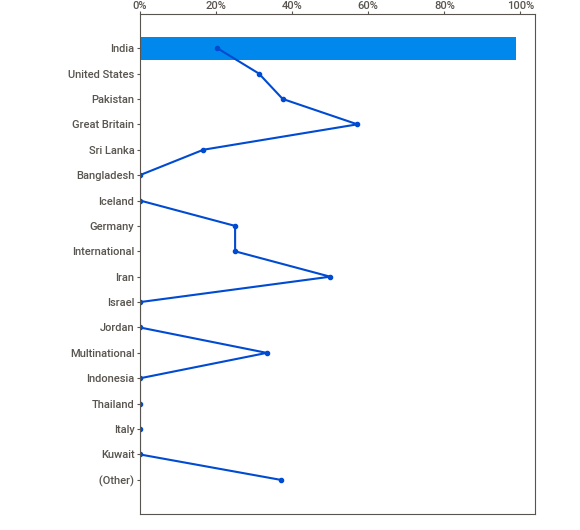
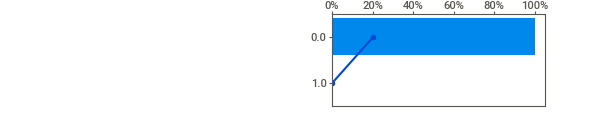
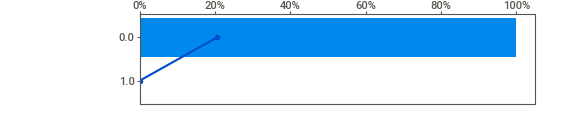
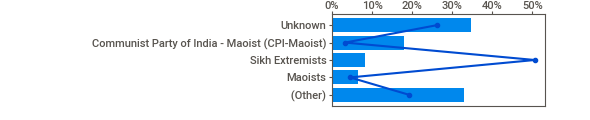
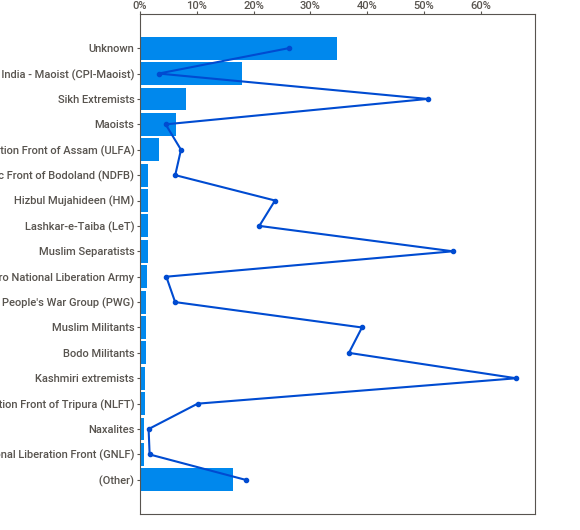
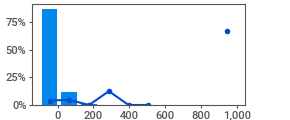
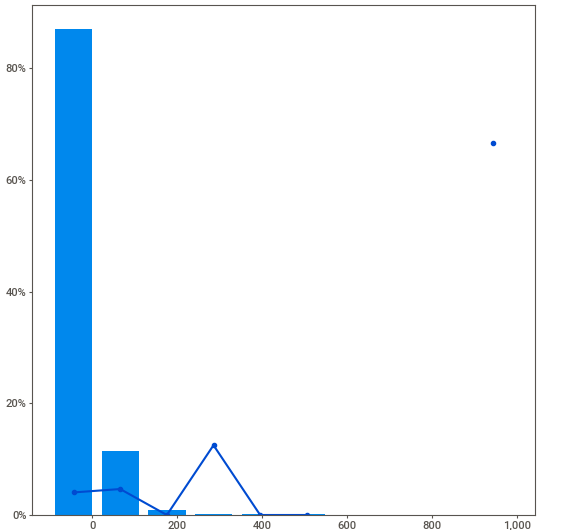
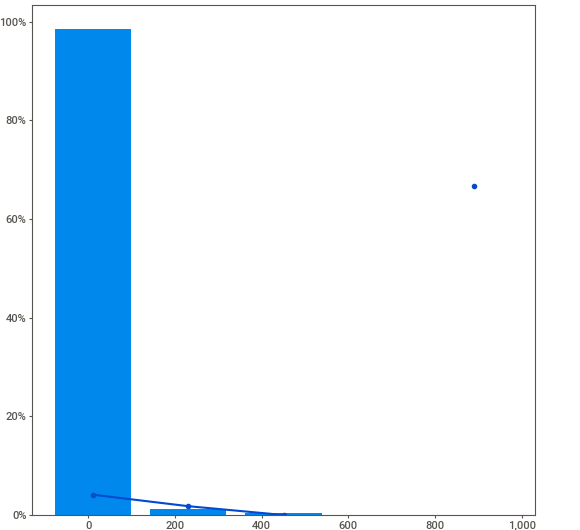
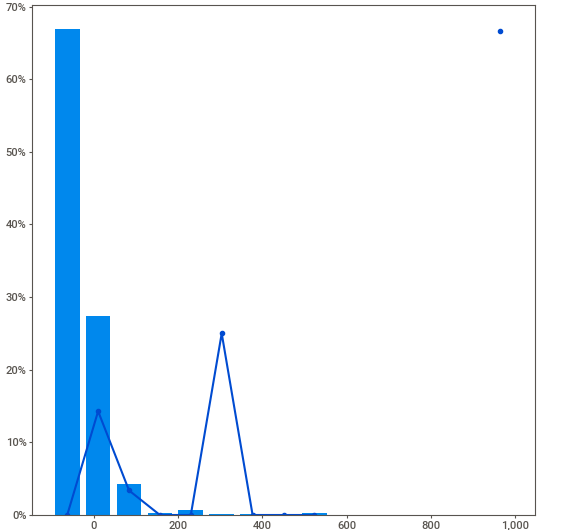
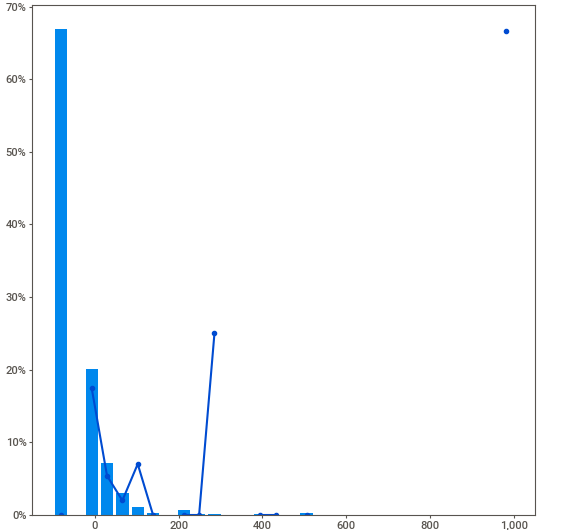
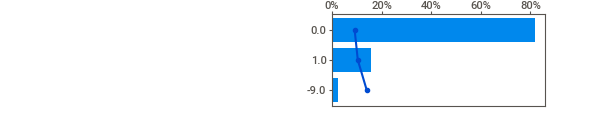
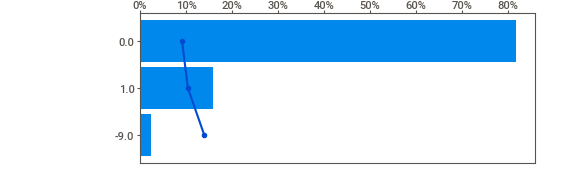
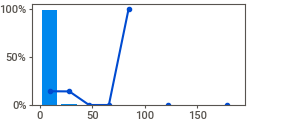
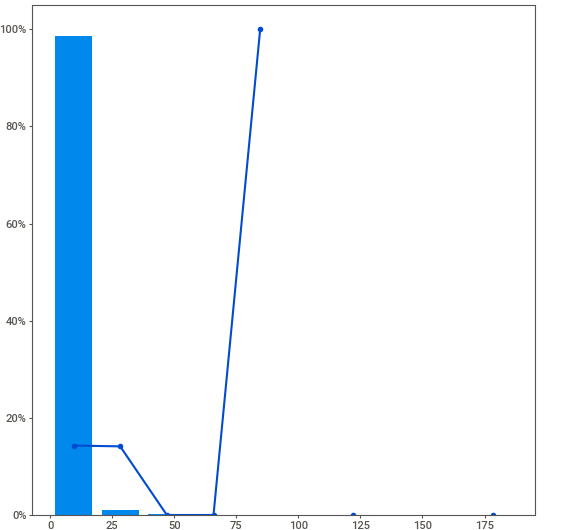
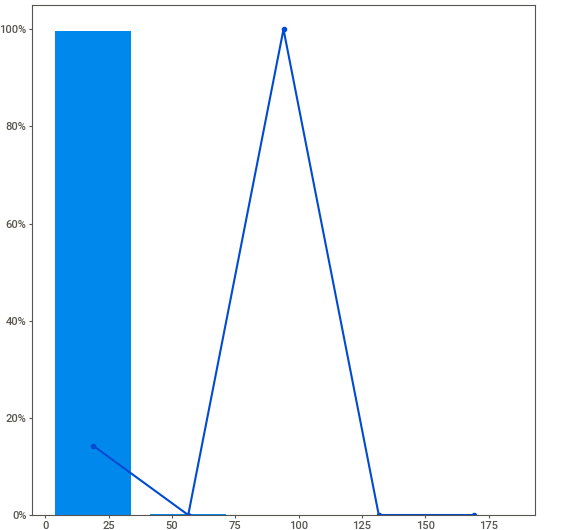
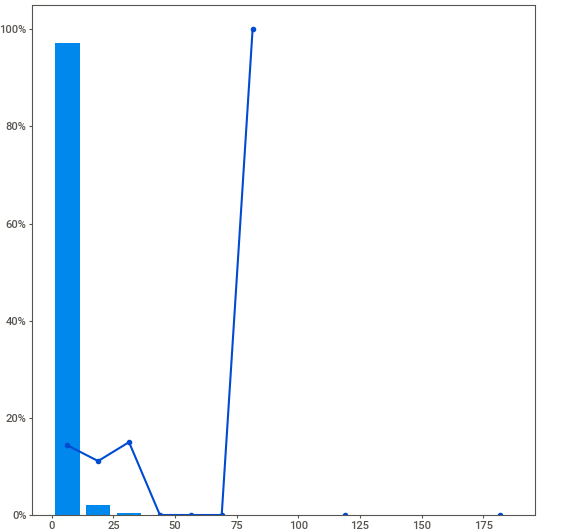
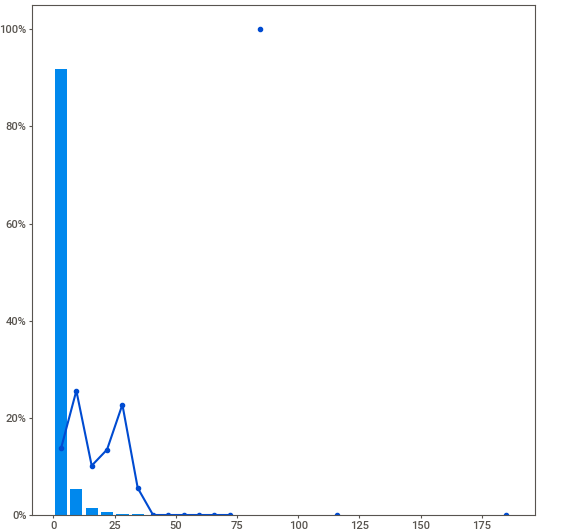
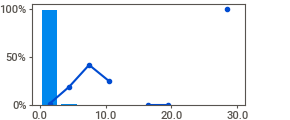
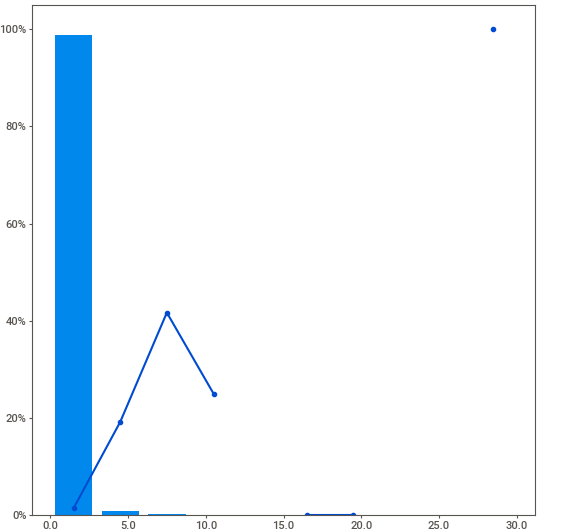
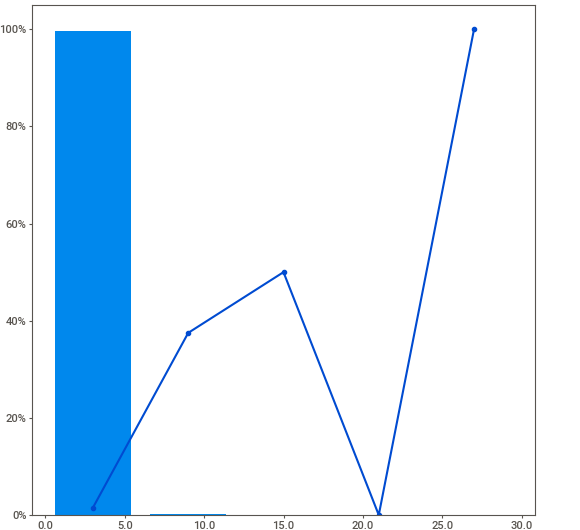
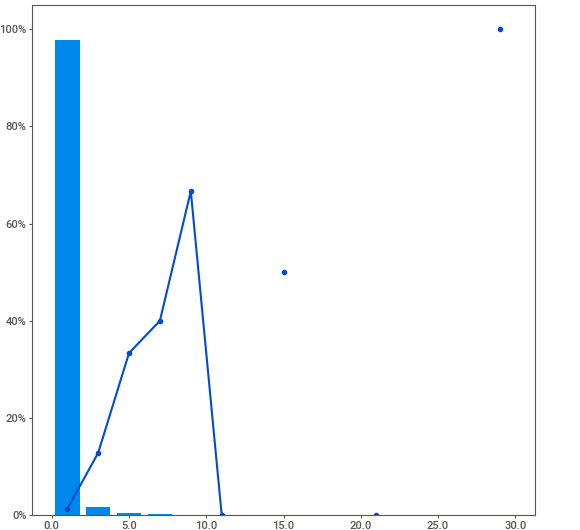
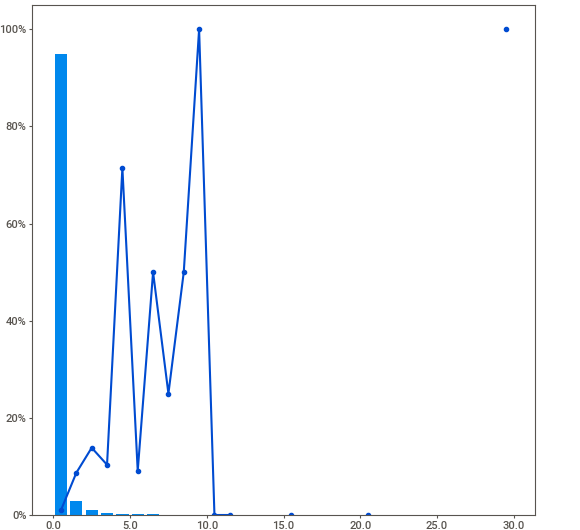
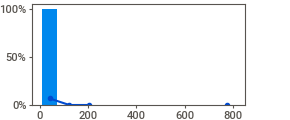
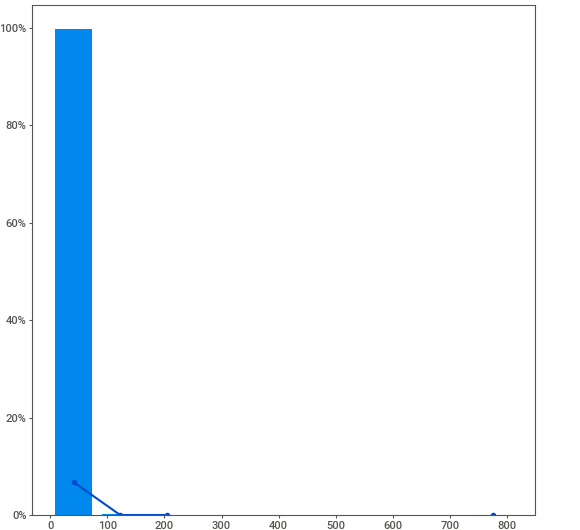
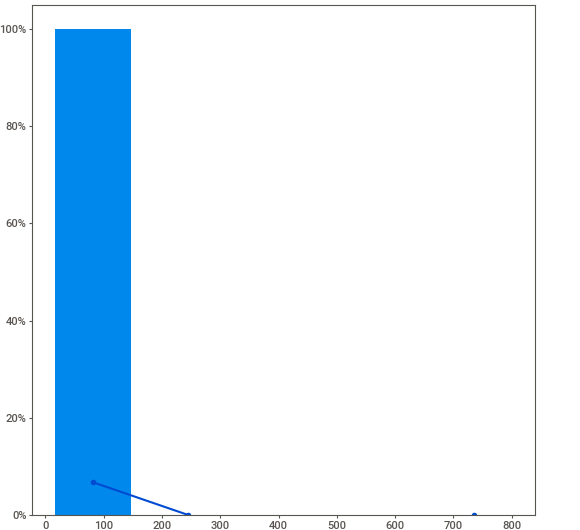
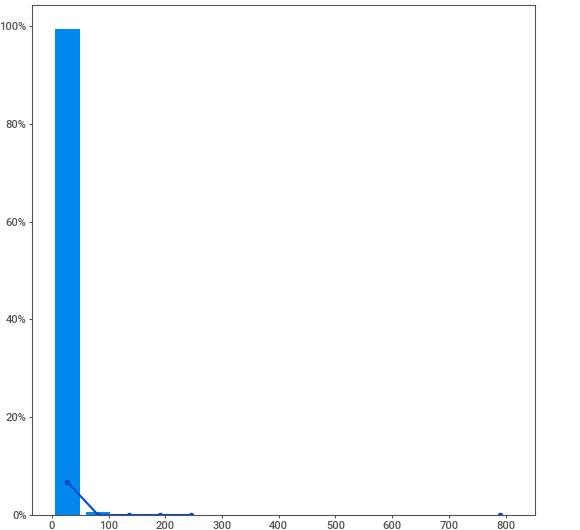
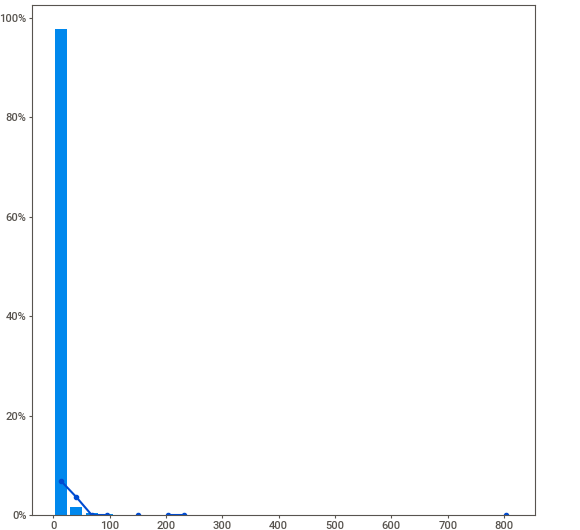
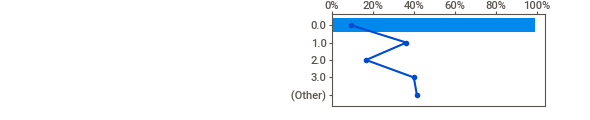
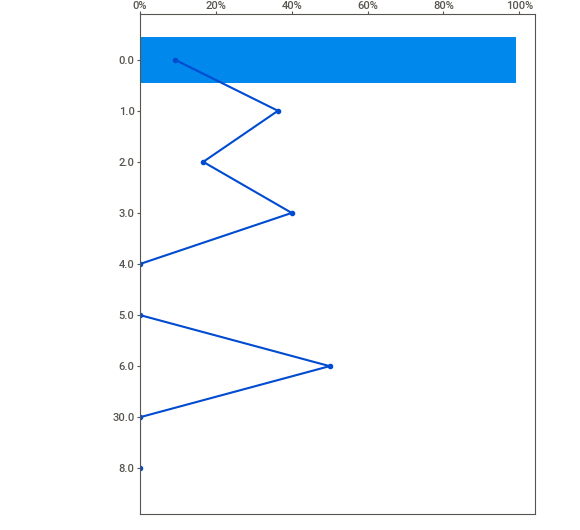
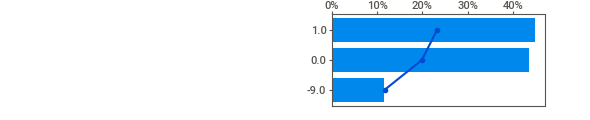
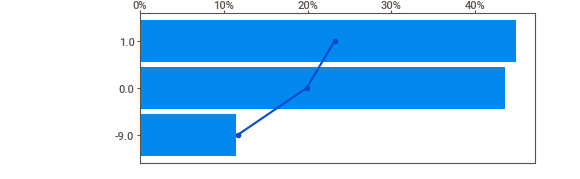
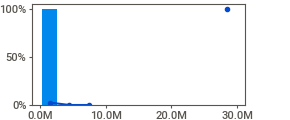
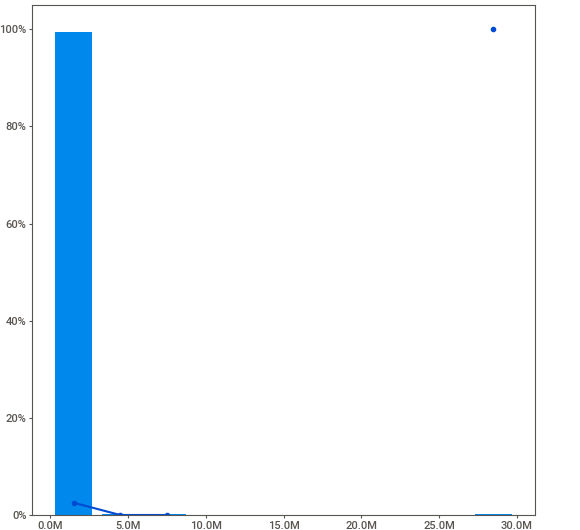
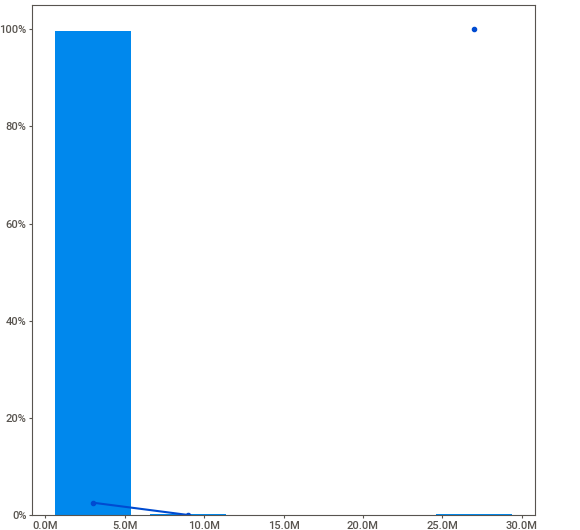
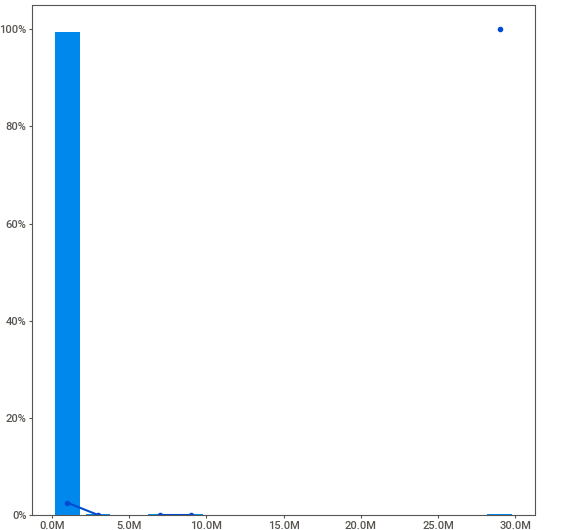
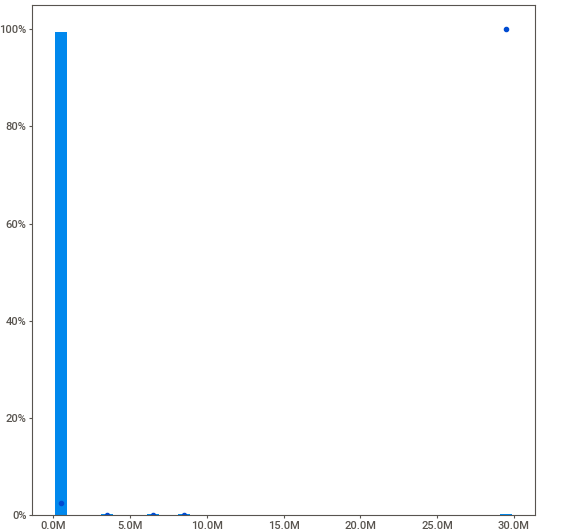
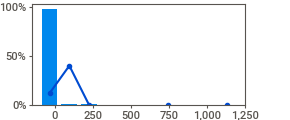
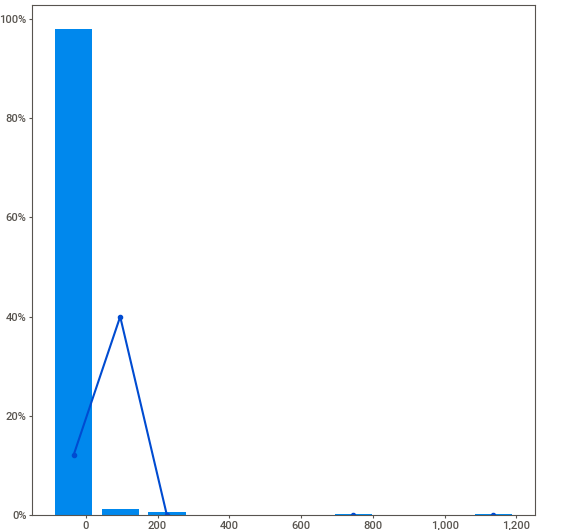
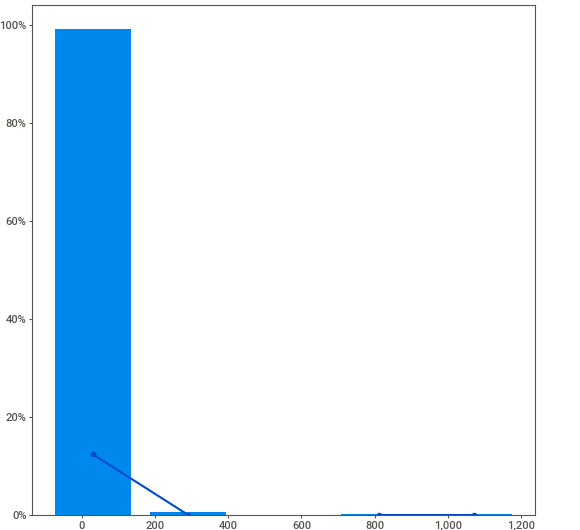
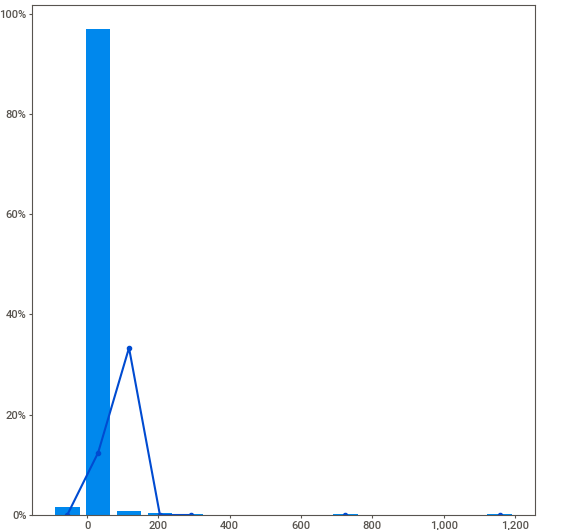
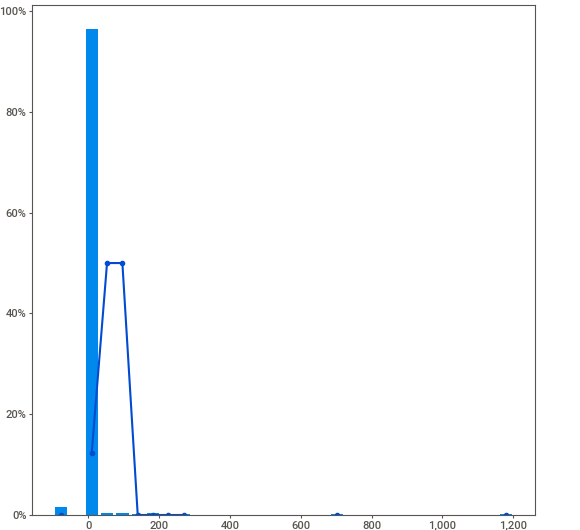
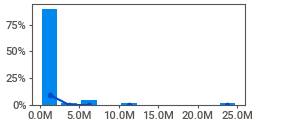
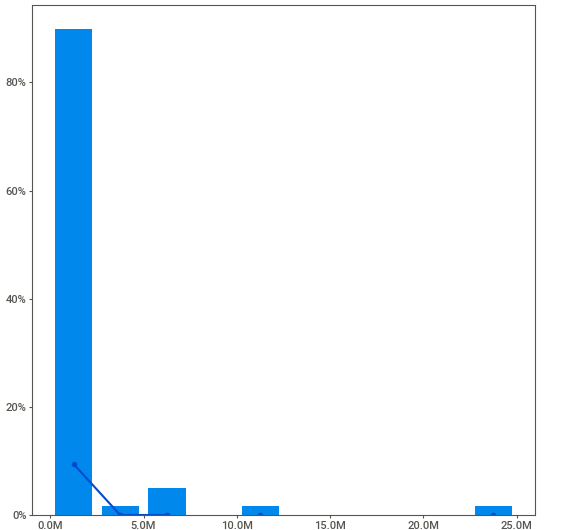
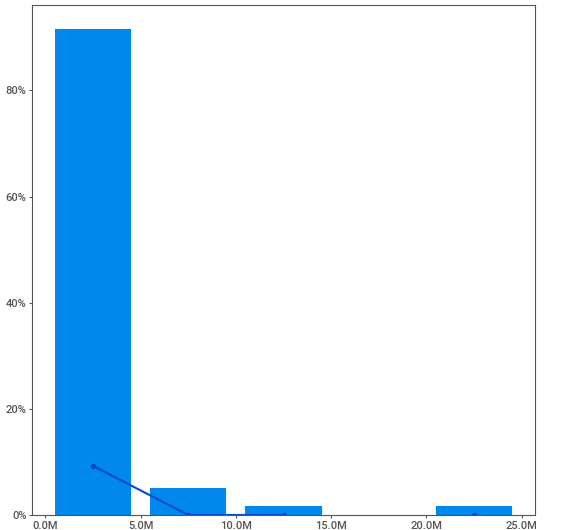
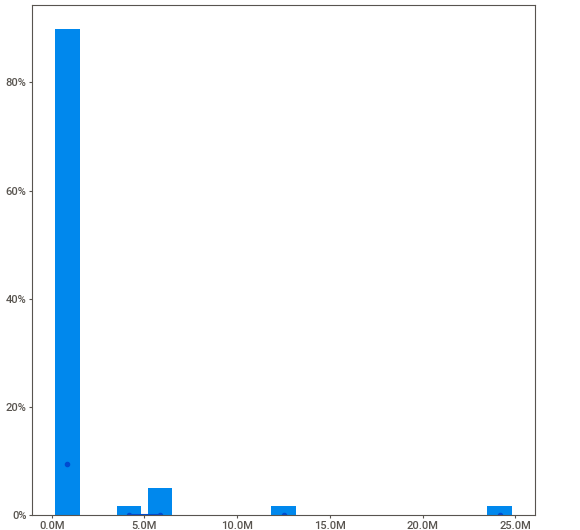
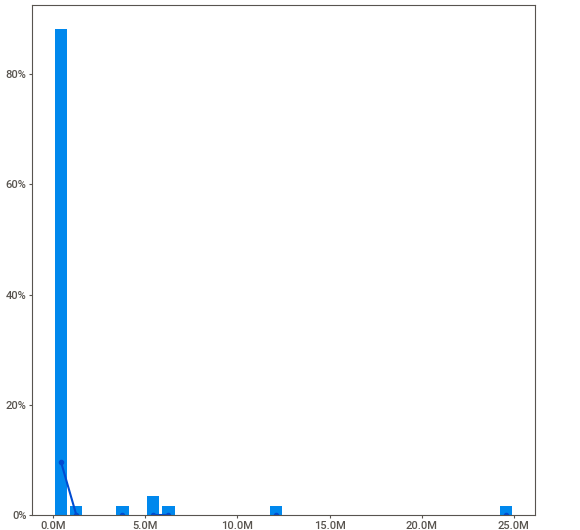
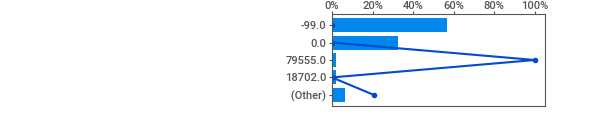
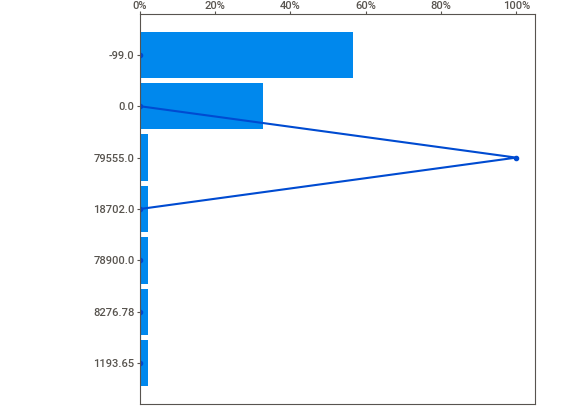
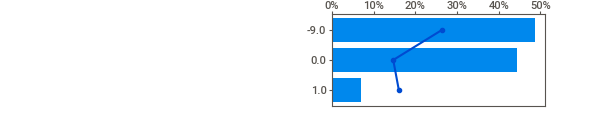
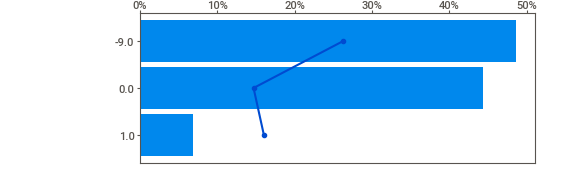
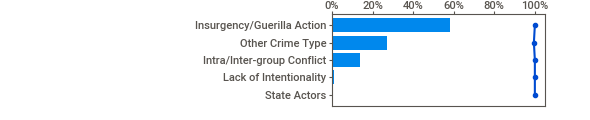
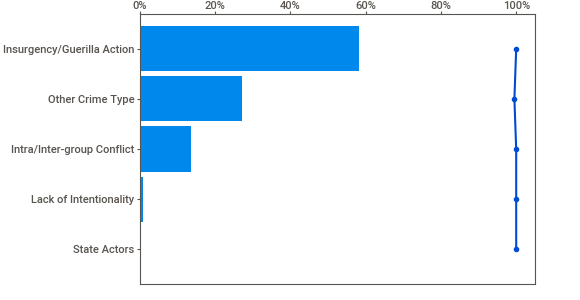
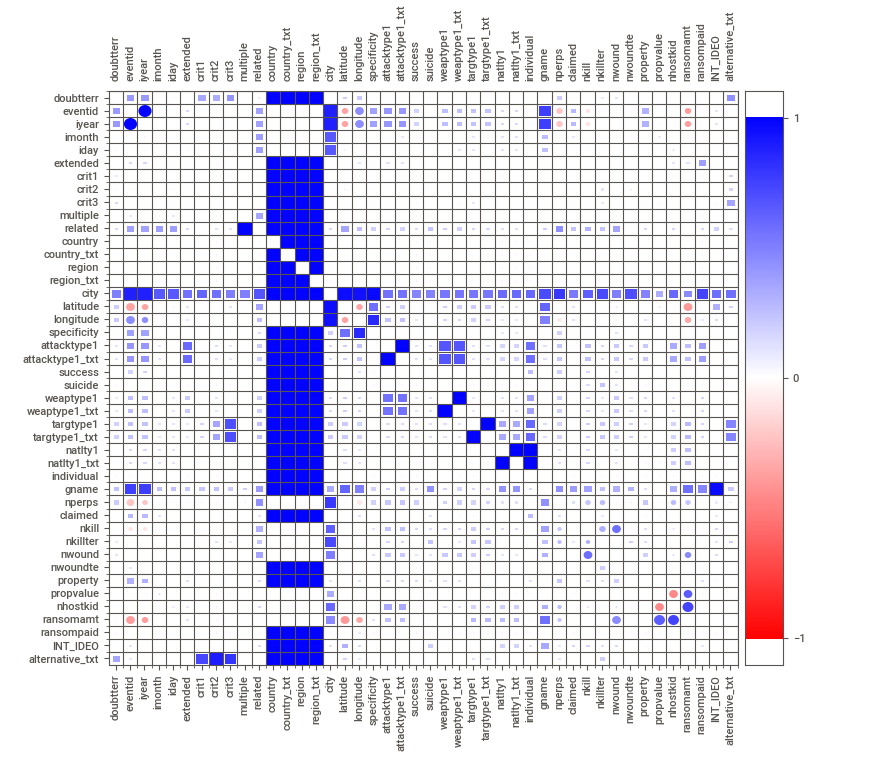
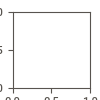

In [63]:
import IPython
IPython.display.HTML(filename = '/content/SWEETVIZ_REPORT_BOOL.html')

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


# RAW_DATASET

File encoding decoder utf-8 does not work for this file
File encoding decoder iso-8859-11 does not work for this file
File encoding decoder cpl252 does not work for this file
Shape of your Data Set: (181691, 135)
Classifying variables in data set...
    134 Predictors classified...
        This does not include the Target column(s)
    81 variables removed since they were ID or low-information variables
    List of variables removed: ['eventid', 'approxdate', 'resolution', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'guncertain2', 'guncertain3', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2',

:TARGET::                          |▍                 | [  2%]   25:38  -> (18:48:23 left)


Could not draw Time Series plots
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 343.750


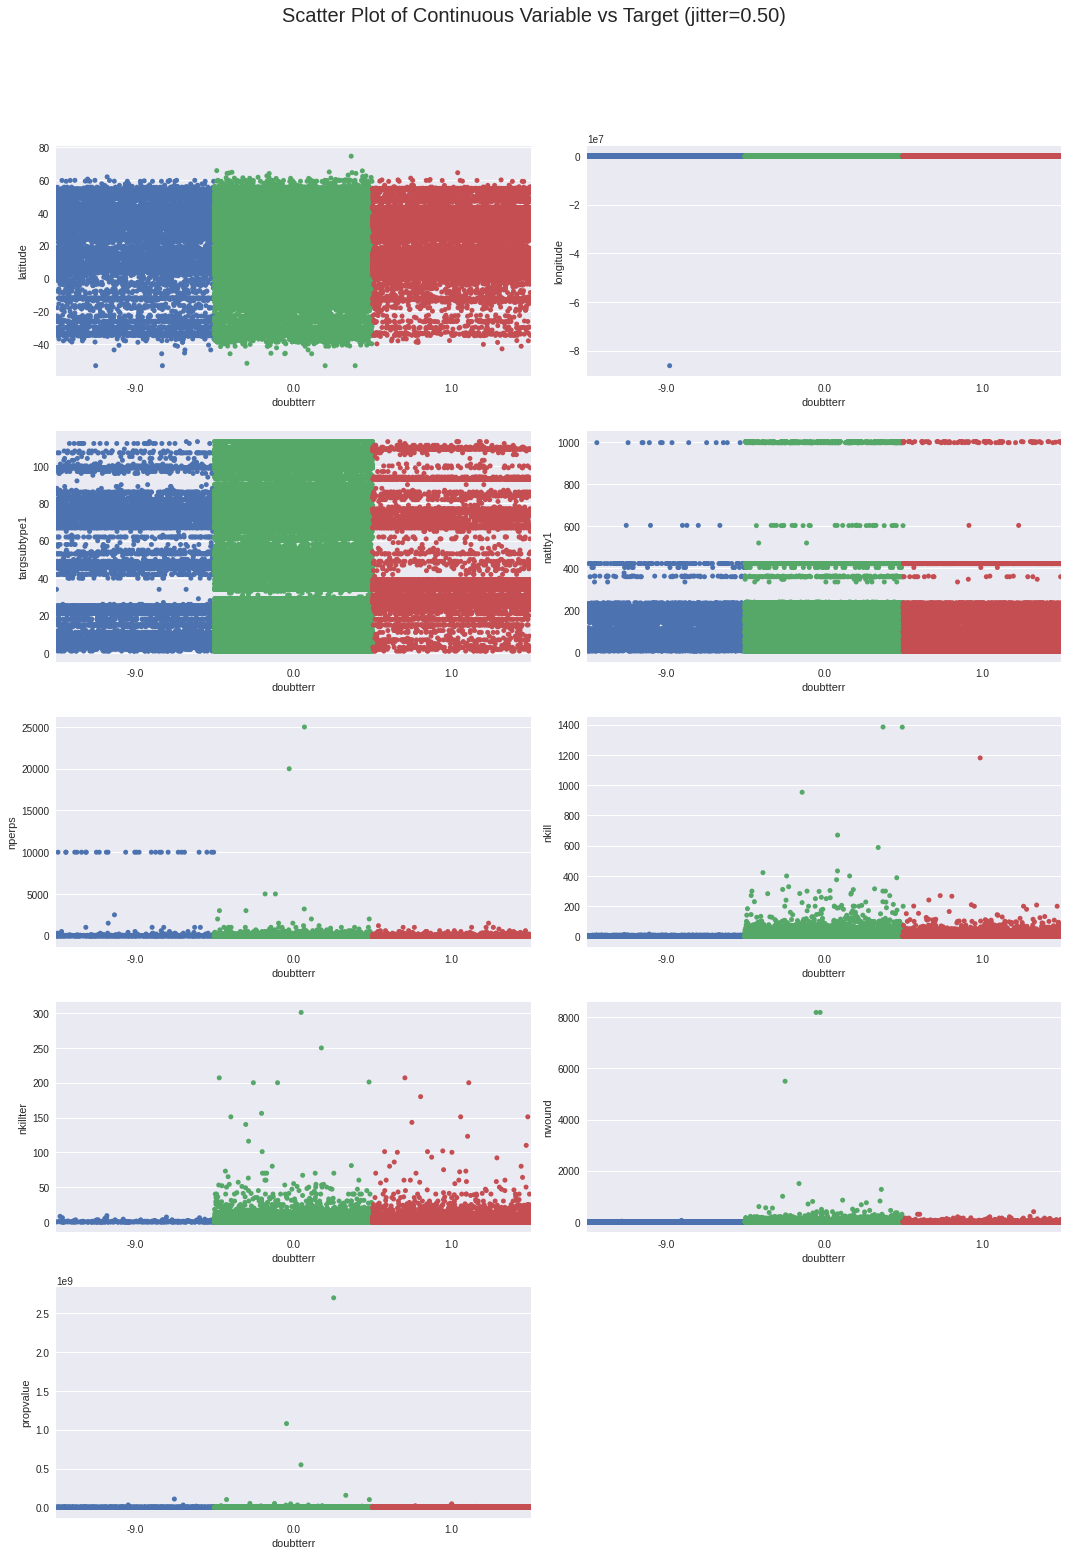

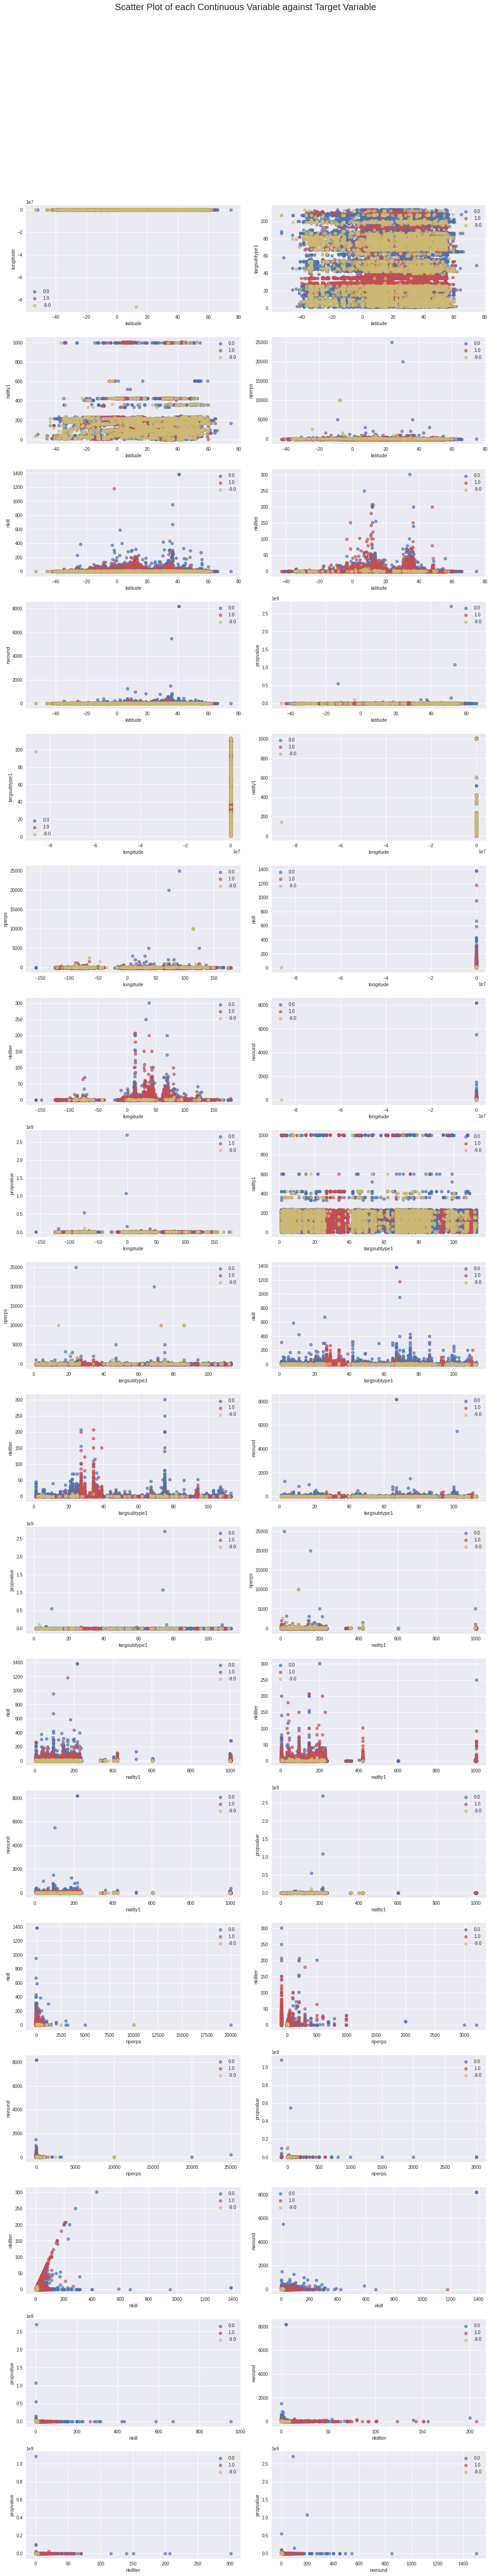

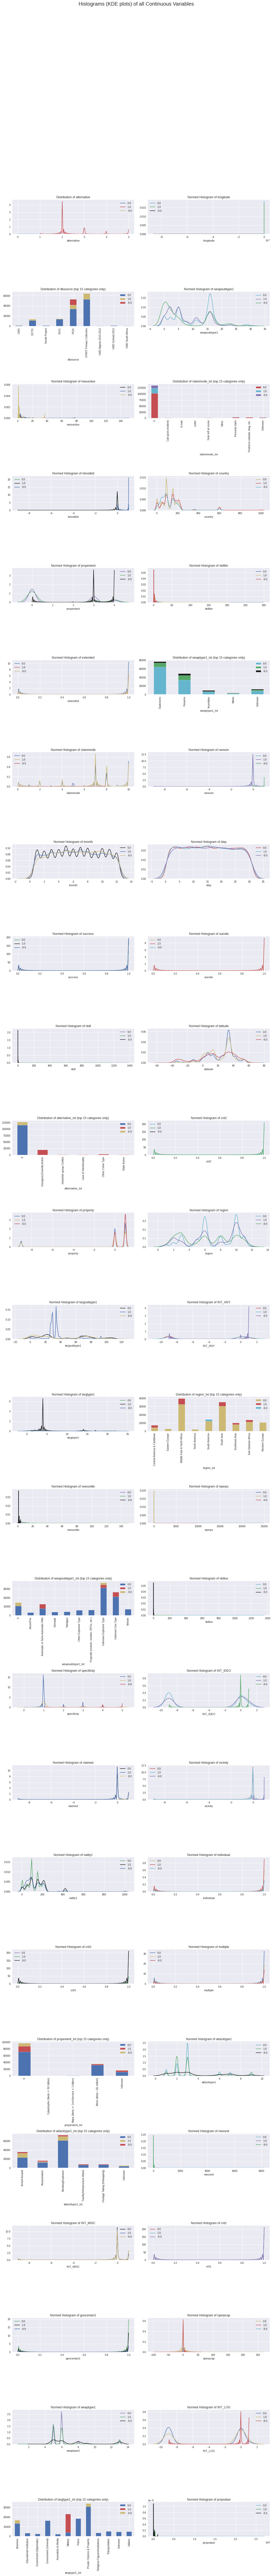

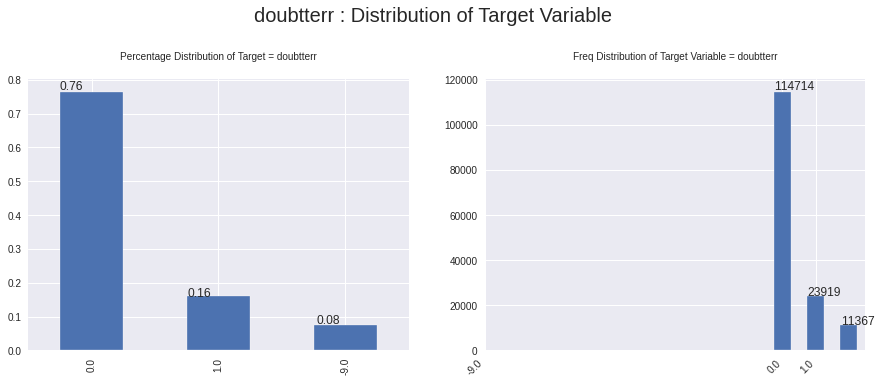

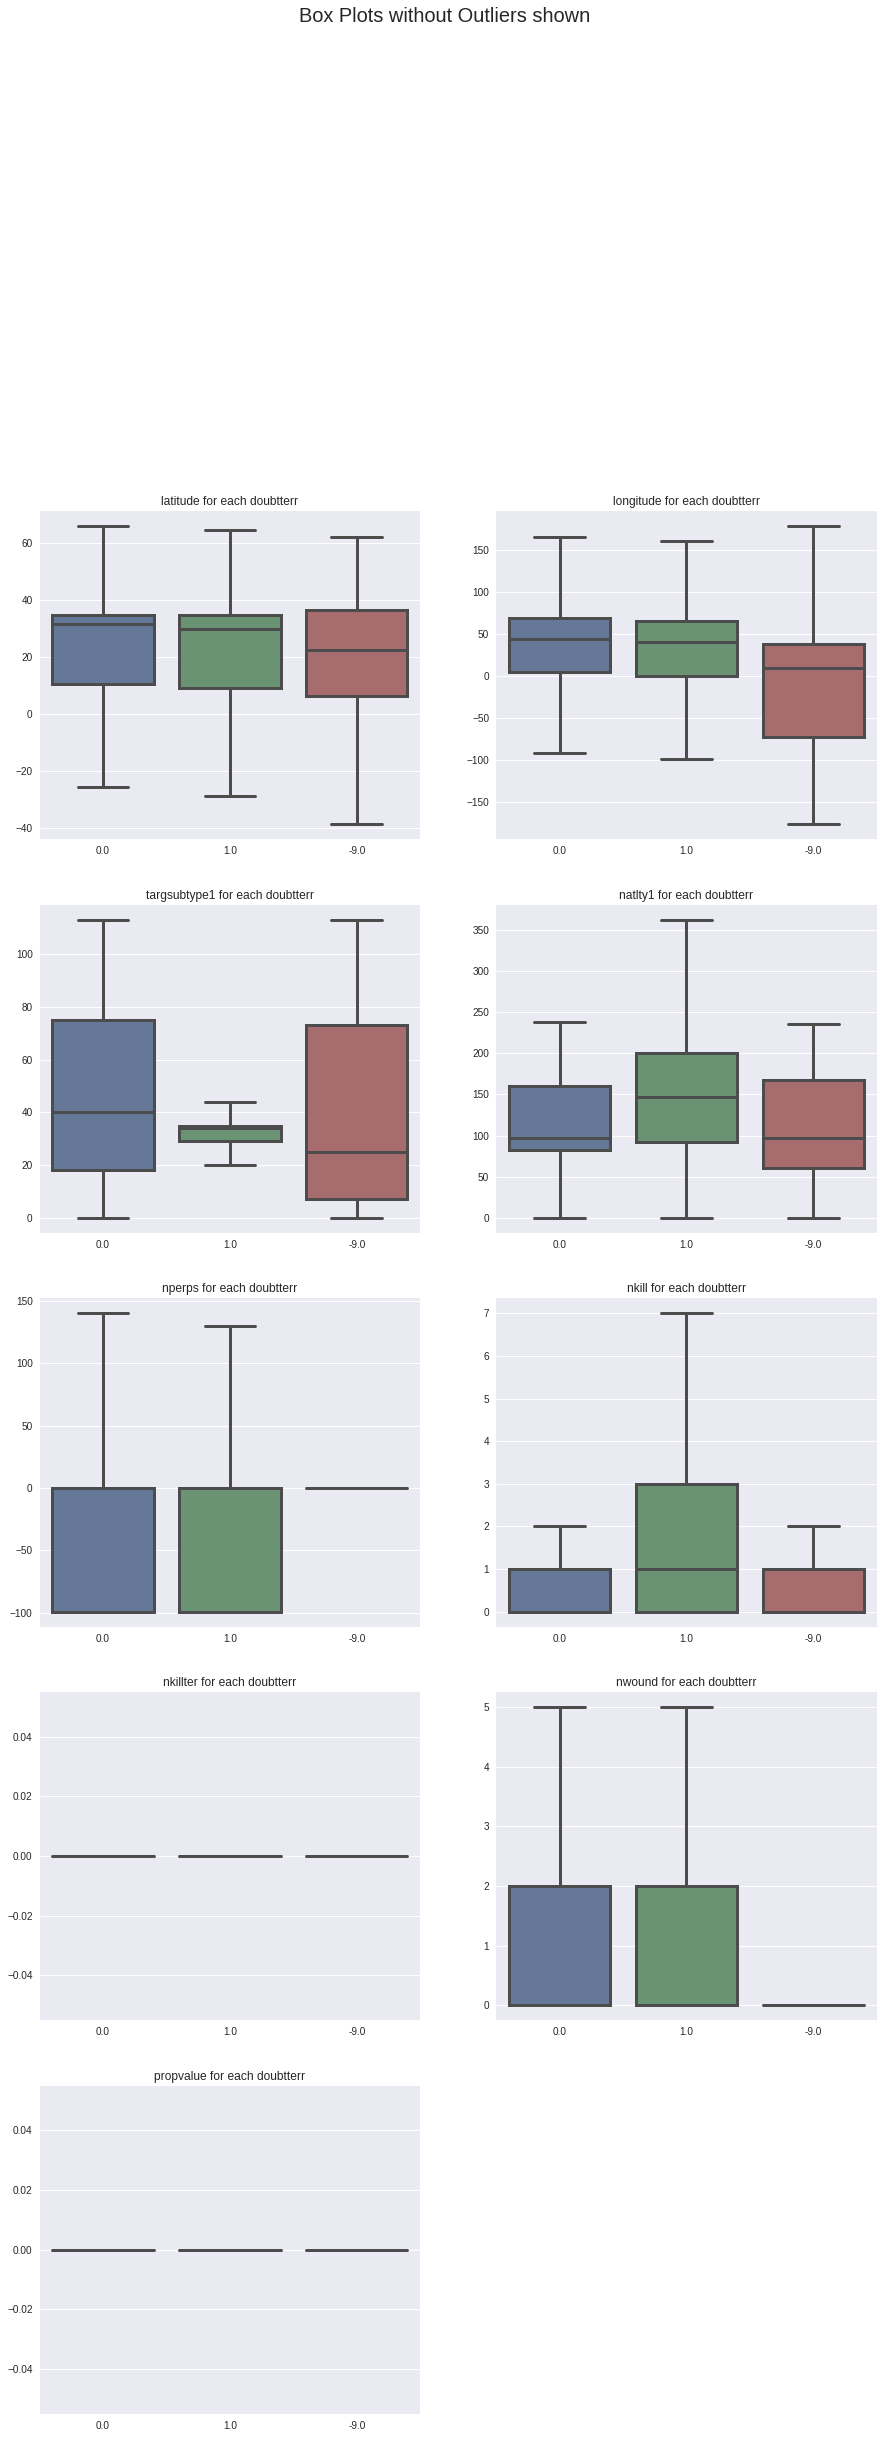

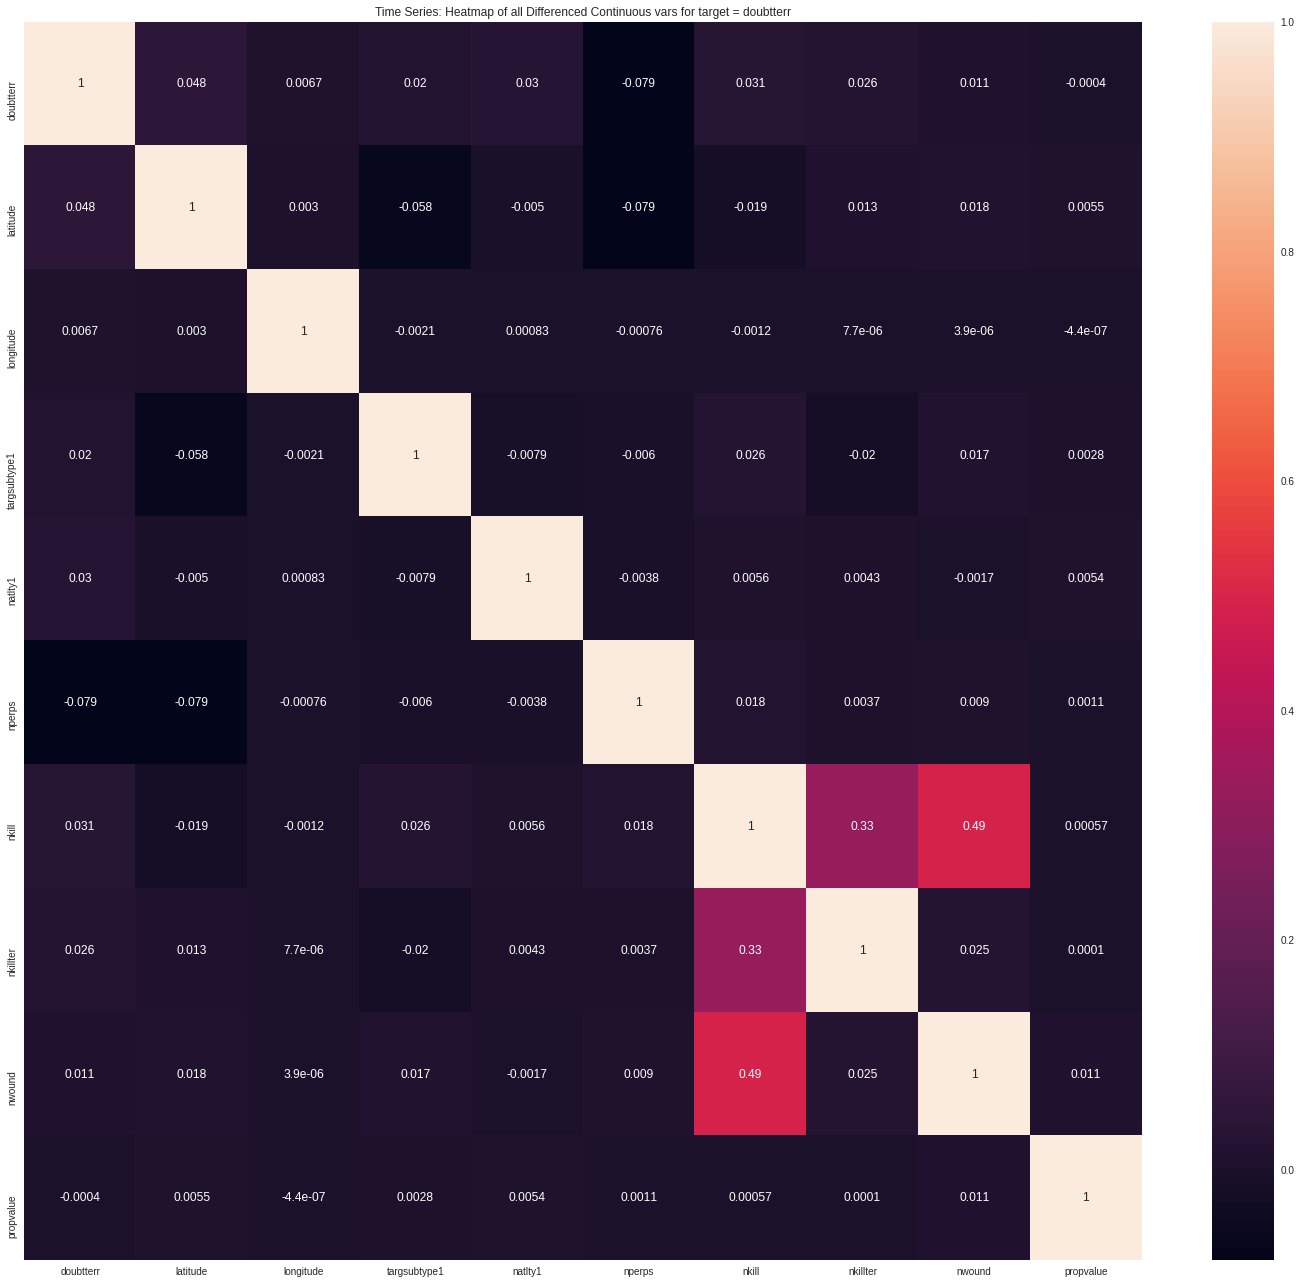

In [ ]:
df = AV.AutoViz('GLOBAL_TERRORISM.csv', depVar='doubtterr', verbose=2)

In [64]:
ind.head()

eventid  iyear  imonth  ...  INT_IDEO doubtterr alternative_txt
1186  197202220004   1972       2  ...       1.0     False             NaN
2764  197501190004   1975       1  ...       0.0     False             NaN
3857  197605260001   1976       5  ...      -9.0     False             NaN
5327  197709280004   1977       9  ...       1.0     False             NaN
7337  197901130004   1979       1  ...       0.0      True             NaN

[5 rows x 44 columns]

In [72]:
ind.to_csv('/content/drive/My Drive/GTD_GOOGLE_COLLAB/ind.csv')

Shape of your Data Set: (8672, 45)
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  13
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  8
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  2
    Number of Columns to Delete =  9
    44 Predictors classified...
        This does not include the Target column(s)
    14 variables removed since they were ID or low-information variables
    List of variables removed: ['Unnamed: 0', 'eventid', 'country', 'country_txt', 'region', 'region_txt', 'propvalue', 'nhostkid', 'ransomamt', 'ransompaid', 'alternative_txt', 'related', 'city', 'gname']

################### Binary-Class VISUALIZATION Started #####################
   Total columns > 30, too numerous to list

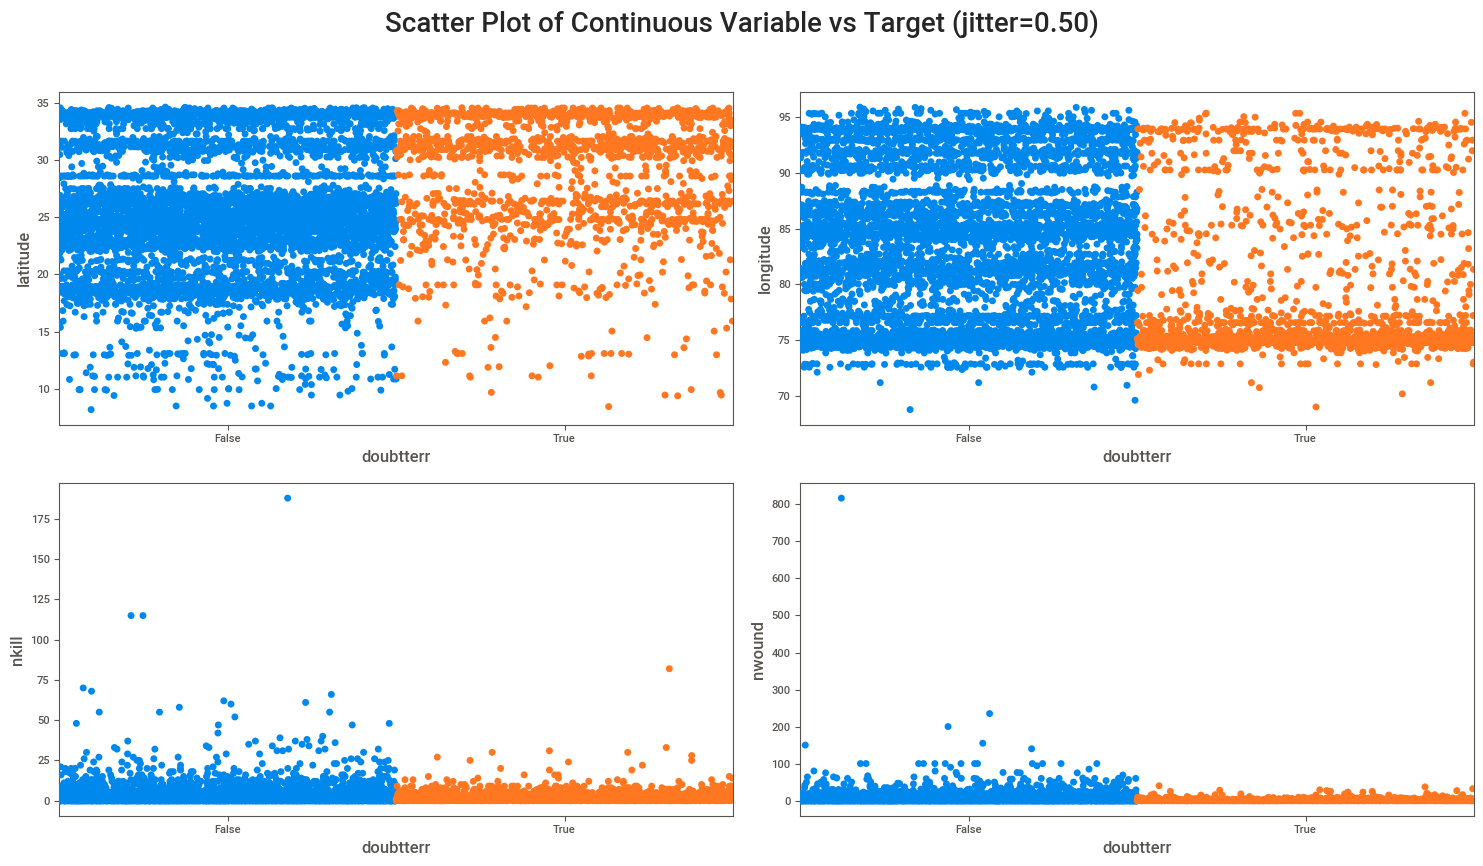

Total Number of Scatter Plots = 10


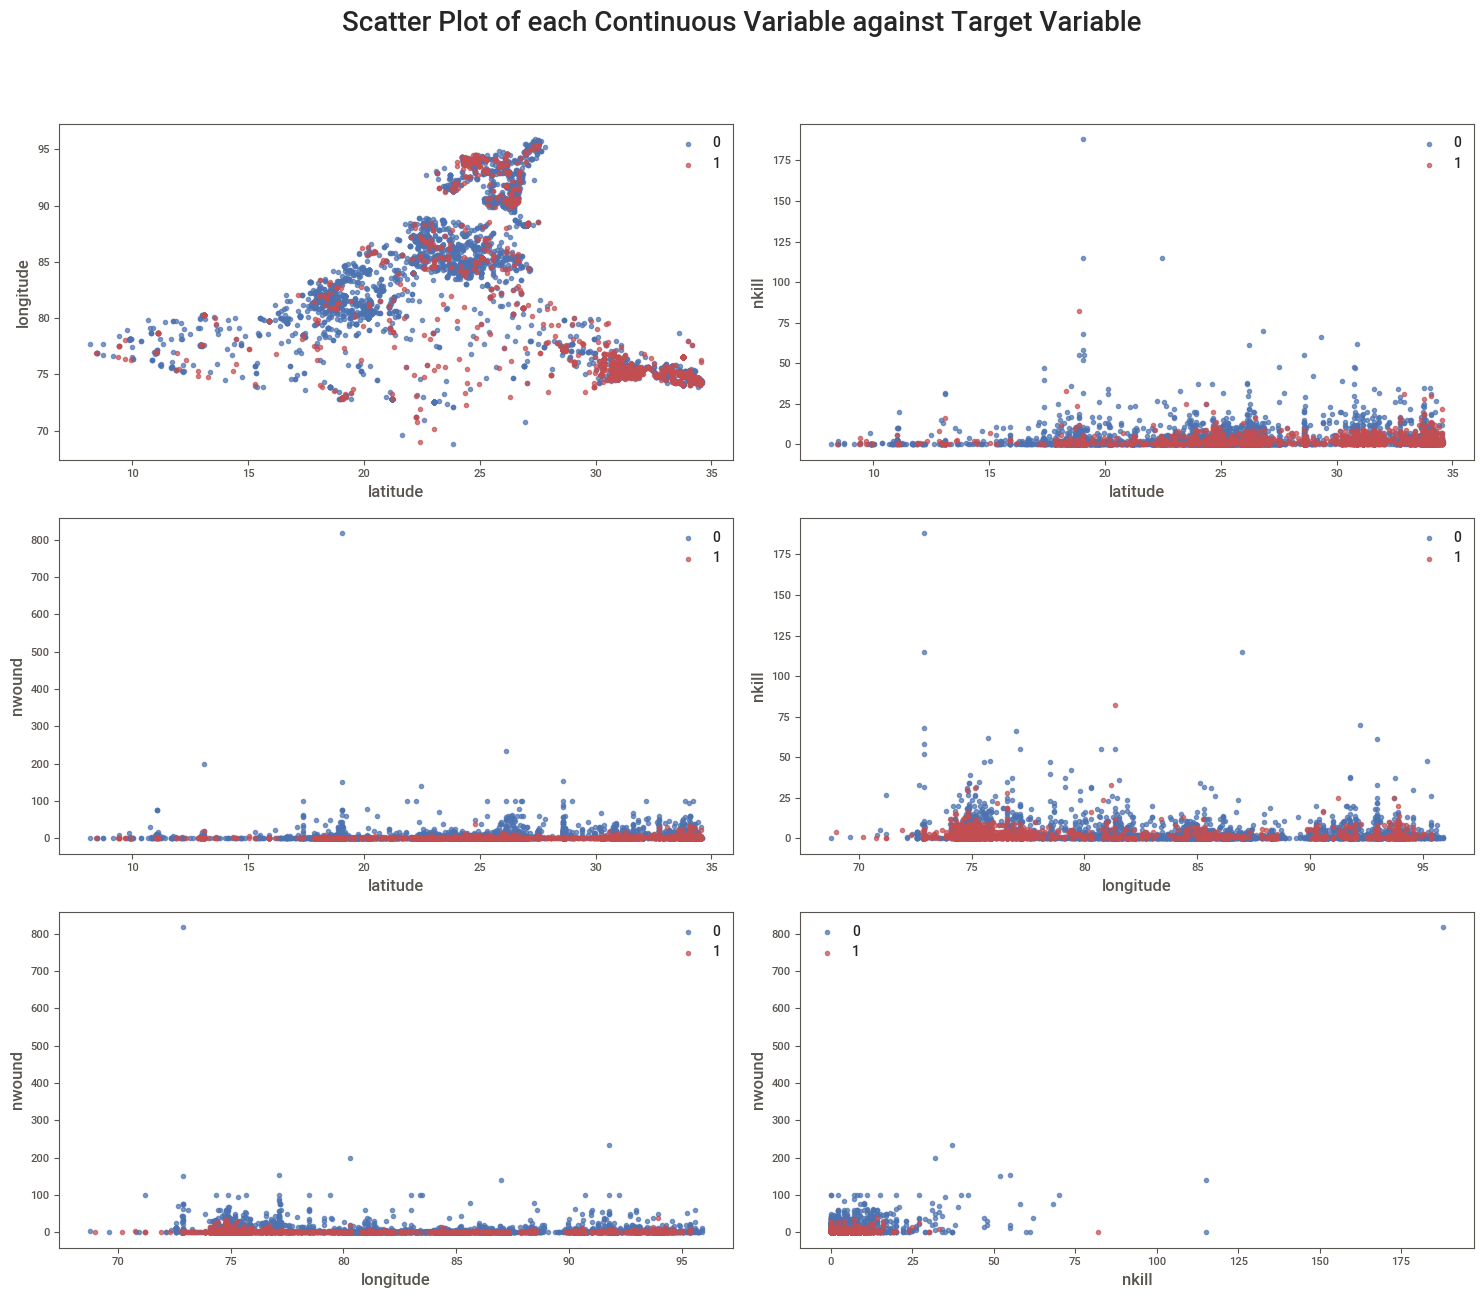

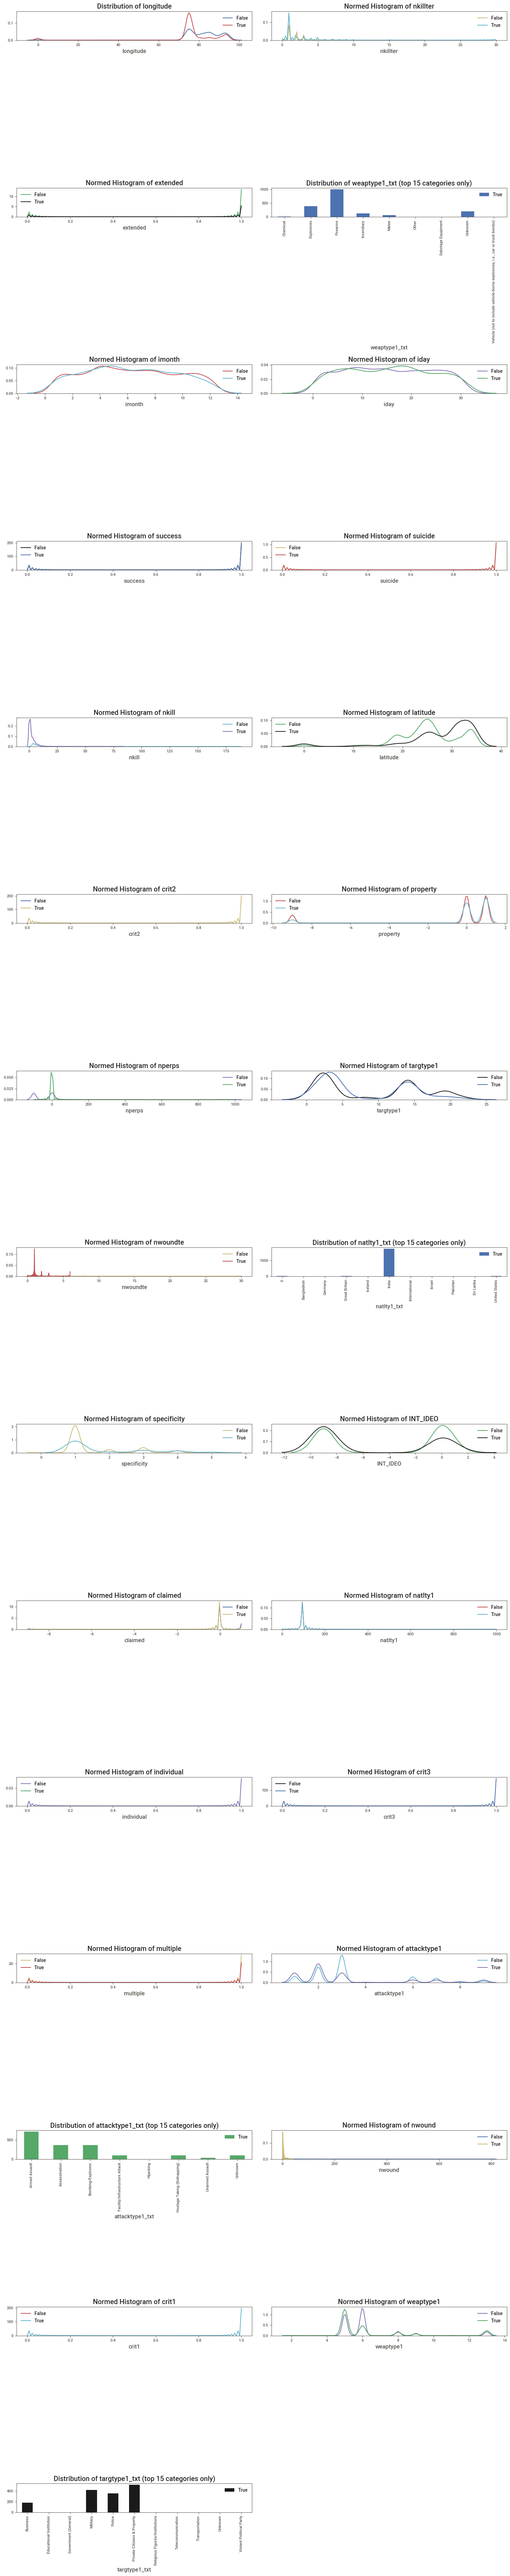

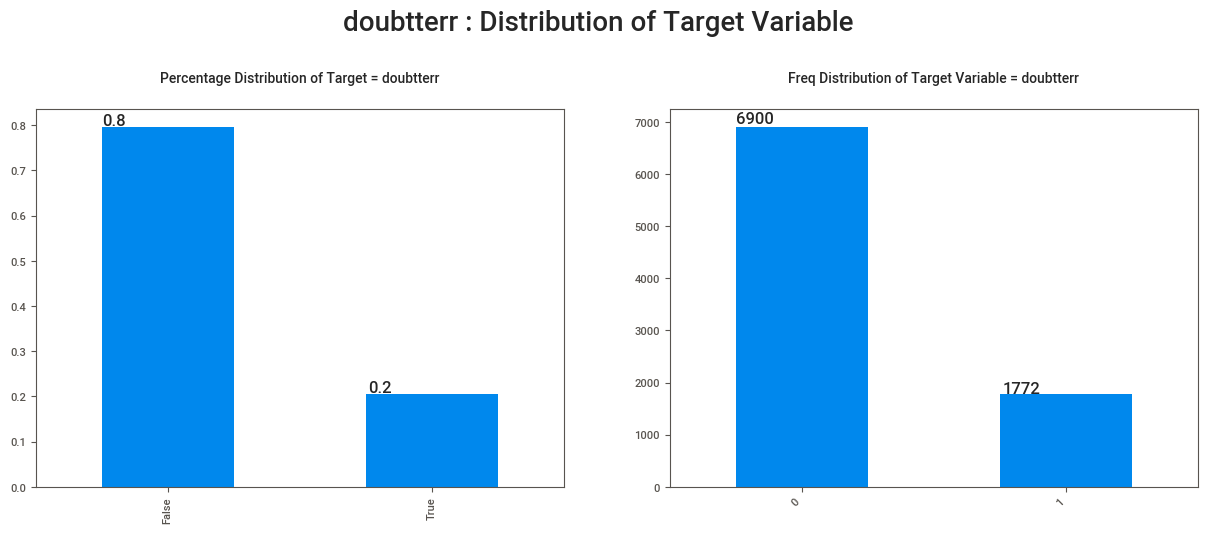

Could not draw Violin Plots


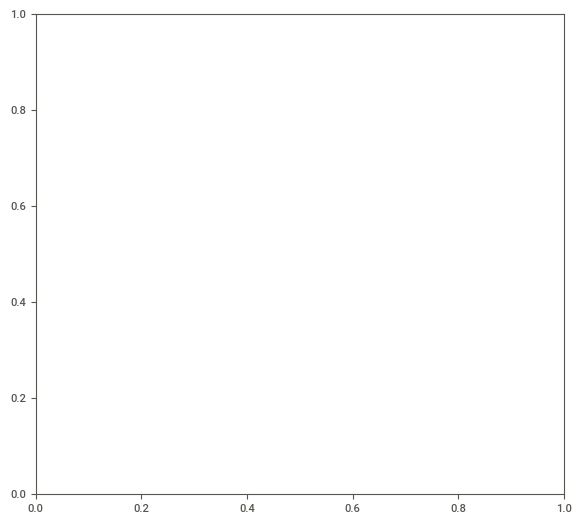

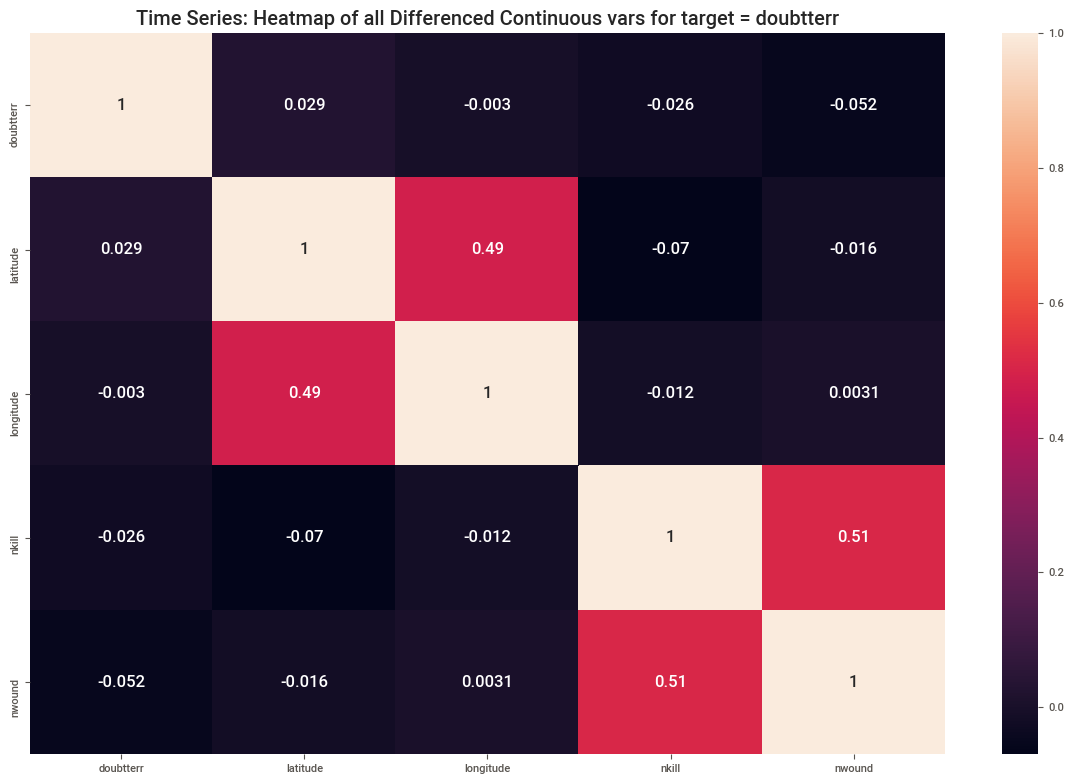

Could not draw Time Series plots
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 12.648

 ###################### VISUALIZATION Completed ########################


In [73]:
df = AV.AutoViz('/content/drive/My Drive/GTD_GOOGLE_COLLAB/ind.csv', depVar='doubtterr', verbose=1)

In [76]:
ind.head()

eventid  iyear  imonth  ...  INT_IDEO doubtterr alternative_txt
1186  197202220004   1972       2  ...       1.0     False             NaN
2764  197501190004   1975       1  ...       0.0     False             NaN
3857  197605260001   1976       5  ...      -9.0     False             NaN
5327  197709280004   1977       9  ...       1.0     False             NaN
7337  197901130004   1979       1  ...       0.0      True             NaN

[5 rows x 44 columns]

In [74]:
df

imonth  iday  extended  crit1  ...  nwoundte  property  INT_IDEO  doubtterr
0          2    22         0      1  ...       0.0       0.0       1.0      False
1          1     2         0      1  ...       0.0       0.0       0.0      False
2          5    26         0      1  ...       0.0       1.0      -9.0      False
3          9    28         0      1  ...       0.0       0.0       1.0      False
4          1    13         0      1  ...       0.0       1.0       0.0       True
...      ...   ...       ...    ...  ...       ...       ...       ...        ...
8667       6    12         0      1  ...       0.0       0.0       1.0       True
8668       6    12         0      1  ...       0.0       0.0      -9.0       True
8669       6    12         0      1  ...       0.0       0.0      -9.0      False
8670       6    12         0      1  ...       0.0       0.0      -9.0      False
8671       6    12         0      1  ...       0.0       0.0      -9.0      False

[8672 rows x 30 columns]

In [ ]:
%load_ext google.colab.data_table

In [ ]:
%unload_ext google.colab.data_table